###### Import Statement

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.tree import export_graphviz
from scipy import misc
%matplotlib inline
from sklearn.cluster import DBSCAN
import copy

###### Preprocessing

In [45]:
#Reading dataset from the csv file
dataset=pd.read_csv('glass.csv')
#Randomozing the dataset rows
np.random.seed(1)
shuffled_index=np.random.permutation(dataset.index)
dataset=dataset.loc[shuffled_index]

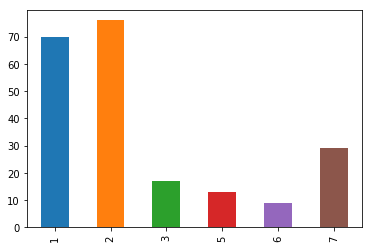

In [6]:
#NonUniform distribution of data
dataset['Type'].value_counts().sort_index().plot.bar()
plt.show()
# Labels are the values we want to predict
labels = np.array(dataset['Type'])

In [7]:
#Convert dataset into taarget and attribute set
# axis 1 refers to the columns
dataset_data= dataset.drop('Type', axis = 1)
dataset_target=dataset['Type']
feature_list=dataset_data.columns

In [153]:
#Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(dataset_data, dataset_target, test_size=0.5, random_state=1)

###### Random Forest from sklearn 

In [172]:
#Creating random forest object and training the forest with the training data
objRandom=RandomForestClassifier(n_estimators=500,random_state=1)
objRandom.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

###### Pruning Random Forest from skLearn

In [173]:
#Decision trees in the random forest
print(objRandom.estimators_)

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1791095845, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=2135392491, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_le

C:\Users\Petrofac\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


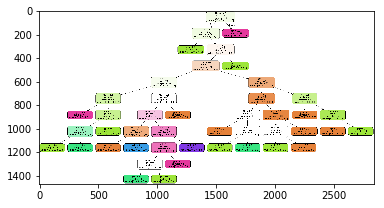

In [174]:
# Acessing a tree from random forest classifier
randomForestTree1 = objRandom.estimators_[0]
# Export the image to a dot file
export_graphviz(randomForestTree1, out_file = 'tree.dot', feature_names = feature_list, filled=True, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png');
file = misc.imread('tree.png')
plt.imshow(file)

In [175]:
listColumn=[]
instanceNumbr ='inst'
for inst in range(len(X_train)):
    columnHeader=instanceNumbr+str(inst+1)
    listColumn.append(columnHeader)

listlabel=[]
decisionTree ='DTree'
for header in range(objRandom.n_estimators):
    rowHeader=decisionTree+str(header)
    listlabel.append(rowHeader)

tree_weight=[]
listPredict=[]
for estimators in objRandom.estimators_:
    estimators.classes_=objRandom.classes_
    predictions=estimators.predict(X_train)
    #To store the weight of each tree
#     misclassified_samples = X_train[y_train != predictions]
#     incorrect_prediction,N=misclassified_samples.shape
#     print(incorrect_prediction)
    trueclassified_samples = X_train[y_train == predictions]
#     print(trueclassified_samples.shape[0])
#     print(X_train.shape)
    weight=(trueclassified_samples.shape[0])/(X_train.shape[0])
#     print(weight)
    tree_weight.append(weight)
    listPredict.append(predictions)
#     print(predictions)
    #print(estimators)
    
#print(listColumn)
#print(listlabel)
#print(listPredict)
#tListPredict=np.transpose(listPredict)
#print(tListPredict)
tree_weight_df=pd.DataFrame(tree_weight,columns=['Weight'])
dataset = pd.DataFrame(listPredict,columns=listColumn)
df2 = pd.DataFrame(listlabel)
clusterSet=pd.concat([df2,dataset,tree_weight_df],axis=1)
# tc = np.transpose(clusterSet)
# pd.concat([df2,df1],axis=1)
# print(tc.head())
# tc1= tc.drop(0, axis = 1)
# print(clusterSet)
# print(listPredict)

In [176]:
clusterSet.shape

(500, 109)

###### Distance Claculation -Simple mismatch compuation
        

In [177]:
def get_mismatchdistance(tree_One,tree_Two):
    diff=0
    dimension=len(tree_One)
#     print(tree_One)
#     print(tree_Two)
    for inst in range(dimension):
        if(tree_One[inst]==tree_Two[inst]):
            diff=diff
        else:
            diff=diff+1  
            
    diff=int(round(diff))        
    return diff

In [178]:

tree_nesteList=[[] for i in range(10)]
diversity_matrix=np.zeros((100,100))
# print(tree_nesteList)
# print(diversity_matrix)
for i in range(100):
    for j in range(100):
        diversity_matrix[i][j]=get_mismatchdistance(listPredict[i],listPredict[j])      
#         print(diversity_matrix)
print(diversity_matrix)
diversity_matrix.shape

[[ 0. 26. 35. ... 21. 28. 22.]
 [26.  0. 33. ... 22. 21. 30.]
 [35. 33.  0. ... 30. 32. 29.]
 ...
 [21. 22. 30. ...  0. 24. 27.]
 [28. 21. 32. ... 24.  0. 28.]
 [22. 30. 29. ... 27. 28.  0.]]


(100, 100)

###### Distance Calculation- Weighted distance calculation

In [179]:
def get_weighteddistance(tree_One,tree_Two):
    diff=0
    dimension=len(tree_One)
#     print(tree_One)
#     print(tree_Two)
    for inst in range(dimension):
        if(tree_One[inst]==tree_Two[inst]):
            diff=diff
        else:
            diff=diff+1             
           
    diff=int(round(diff))        
    return diff

In [197]:

tree_nesteList=[[] for i in range(10)]
diversity_matrix=np.zeros((500,500))
# print(tree_nesteList)
# print(diversity_matrix)
for i in range(500):
    for j in range(500):
        distance_tree=get_weighteddistance(listPredict[i],listPredict[j])
        
        weigth_diff=abs(tree_weight[i]-tree_weight[j])
        print(weigth_diff)
        diversity_matrix[i][j]=distance_tree*weigth_diff*100
              
#         print(diversity_matrix)
print(diversity_matrix)
diversity_matrix.shape

0.0
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.03738317757009346
0.03738317757009346
0.0
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.06542056074766356
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.05607476635514019
0.03738317757009346
0.05607476635514019
0.05607476635514019
0.01869158878504673
0.06542056074766356
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.06542056074766356
0.05607476635514019
0.03738317757009346
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.0
0.04672897196261683
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.06542056074766356
0.06542056074766356
0.028037383177570097
0.04672897196261683
0.028037383177570097
0.028037383177570097
0.09345794392523366
0.07476635514018692
0.01869158878504673
0.009345794392523366
0.06542056074766356
0.03738317757009346
0.037383177570093

0.06542056074766356
0.08411214953271029
0.05607476635514019
0.10280373831775702
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.07476635514018692
0.06542056074766356
0.08411214953271029
0.07476635514018692
0.07476635514018692
0.06542056074766356
0.0
0.06542056074766356
0.04672897196261683
0.07476635514018692
0.009345794392523366
0.10280373831775702
0.06542056074766356
0.07476635514018692
0.11214953271028039
0.11214953271028039
0.05607476635514019
0.05607476635514019
0.05607476635514019
0.04672897196261683
0.05607476635514019
0.07476635514018692
0.06542056074766356
0.07476635514018692
0.05607476635514019
0.028037383177570097
0.01869158878504673
0.11214953271028039
0.06542056074766356
0.03738317757009346
0.07476635514018692
0.05607476635514019
0.03738317757009346
0.04672897196261683
0.0
0.06542056074766356
0.10280373831775702
0.01869158878504673
0.028037383177570097
0.11214953271028039
0.028037383177570097
0.09345794392523366
0.08411214953271029
0.05607476635514019
0.03738

0.01869158878504673
0.03738317757009346
0.0
0.05607476635514019
0.04672897196261683
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.07476635514018692
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.06542056074766356
0.04672897196261683
0.06542056074766356
0.06542056074766356
0.028037383177570097
0.07476635514018692
0.0
0.0
0.05607476635514019
0.05607476635514019
0.07476635514018692
0.06542056074766356
0.04672897196261683
0.028037383177570097
0.05607476635514019
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.04672897196261683
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.07476635514018692
0.07476635514018692
0.01869158878504673
0.05607476635514019
0.01869158878504673
0.01869158878504673
0.10280373831775702
0.08411214953271029
0.028037383177570097
0.0
0.07476635514018692
0.04672897196261683
0.04672897196261683
0.0
0.0
0.06542056074766356
0.028037383177570097
0.00

0.028037383177570097
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.009345794392523366
0.0
0.0
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.0
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.0
0.009345794392523366
0.0
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.03738317757009346
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.05607476635514019
0.056

0.05607476635514019
0.05607476635514019
0.07476635514018692
0.09345794392523366
0.06542056074766356
0.11214953271028039
0.03738317757009346
0.04672897196261683
0.05607476635514019
0.08411214953271029
0.07476635514018692
0.09345794392523366
0.08411214953271029
0.08411214953271029
0.07476635514018692
0.009345794392523366
0.07476635514018692
0.05607476635514019
0.08411214953271029
0.01869158878504673
0.11214953271028039
0.07476635514018692
0.08411214953271029
0.12149532710280375
0.12149532710280375
0.06542056074766356
0.06542056074766356
0.06542056074766356
0.05607476635514019
0.06542056074766356
0.08411214953271029
0.07476635514018692
0.08411214953271029
0.06542056074766356
0.03738317757009346
0.028037383177570097
0.12149532710280375
0.07476635514018692
0.04672897196261683
0.08411214953271029
0.06542056074766356
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.07476635514018692
0.11214953271028039
0.028037383177570097
0.03738317757009346
0.12149532710280375
0.03738317757009

0.009345794392523366
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.05607476635514019
0.0
0.0
0.0
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.0
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.009345794392523366
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.0
0.01869158878504673
0.01869158878504673
0.03738

0.11214953271028039
0.06542056074766356
0.06542056074766356
0.08411214953271029
0.10280373831775702
0.07476635514018692
0.12149532710280375
0.04672897196261683
0.05607476635514019
0.06542056074766356
0.09345794392523366
0.08411214953271029
0.10280373831775702
0.09345794392523366
0.09345794392523366
0.08411214953271029
0.01869158878504673
0.08411214953271029
0.06542056074766356
0.09345794392523366
0.028037383177570097
0.12149532710280375
0.08411214953271029
0.09345794392523366
0.13084112149532712
0.13084112149532712
0.07476635514018692
0.07476635514018692
0.07476635514018692
0.06542056074766356
0.07476635514018692
0.09345794392523366
0.08411214953271029
0.09345794392523366
0.07476635514018692
0.04672897196261683
0.03738317757009346
0.13084112149532712
0.08411214953271029
0.05607476635514019
0.09345794392523366
0.07476635514018692
0.05607476635514019
0.06542056074766356
0.01869158878504673
0.08411214953271029
0.12149532710280375
0.03738317757009346
0.04672897196261683
0.13084112149532712

0.009345794392523366
0.04672897196261683
0.04672897196261683
0.07476635514018692
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.06542056074766356
0.01869158878504673
0.03738317757009346
0.09345794392523366
0.03738317757009346
0.0
0.028037383177570097
0.05607476635514019
0.0
0.06542056074766356
0.07476635514018692
0.01869158878504673
0.0
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.04672897196261683
0.09345794392523366
0.11214953271028039
0.01869158878504673
0.04672897196261683
0.06542056074766356
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.07476635514018692
0.009345794392523366
0.08411214953271029
0.07476635514018692
0.009345794392523366
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.03738317757009346
0.05607476635514019
0.05607476635514019
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.028037383177570097
0.140186915887

0.028037383177570097
0.04672897196261683
0.0
0.0
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.009345794392523366
0.0
0.028037383177570097
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.0
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.06542056074766356
0.06542056074766356
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.0
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.028037383177570097
0.01869158878504673
0.06542056074766356
0.01869158878504673
0.04672897196261683
0.0373831775700

0.05607476635514019
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.009345794392523366
0.0
0.0
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.0
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.0
0.009345794392523366
0.0
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.03738317757009346
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.037383

0.01869158878504673
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.0
0.06542056074766356
0.0
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.03738317757009346
0.0
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.04672897196261683
0.0
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.06542056074766356
0.0
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345

0.03738317757009346
0.06542056074766356
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.0
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.0
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.08411214953271029
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.07476635514018692
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.08411214953271029
0.01869158878504673
0.01869158878504673
0.06542056074766356
0.05607476635

0.01869158878504673
0.04672897196261683
0.07476635514018692
0.0
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.05607476635514019
0.04672897196261683
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.09345794392523366
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.08411214953271029
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.01869158878504673
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.03738317757009346
0.05607476635514019
0.04672897196261683
0.09345794392523366
0.028037383177570097
0.009345794392523366
0.0

0.09345794392523366
0.028037383177570097
0.0
0.07476635514018692
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.06542056074766356
0.03738317757009346
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.06542056074766356
0.05607476635514019
0.05607476635514019
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.05607476635514019
0.009345794392523366
0.08411214953271029
0.04672897196261683
0.05607476635514019
0.09345794392523366
0.09345794392523366
0.03738317757009346
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.04672897196261683
0.05607476635514019
0.03738317757009346
0.009345794392523366
0.0
0.09345794392523366
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.08411214953271029
0.0
0.0093457943925233

0.0
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.009345794392523366
0.0
0.0
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.0
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.0
0.009345794392523366
0.0
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.03738317757009346
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.00

0.009345794392523366
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.0
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.0
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.08411214953271029
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.07476635514018692
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.08411214953271029
0.01869158878504673
0.018691588

0.05607476635514019
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.04672897196261683
0.0
0.0
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.009345794392523366
0.0
0.028037383177570097
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.0
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.06542056074766356
0.06542056074766356
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.0
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.028037383177570097
0.01869158878504673
0.06542056

0.05607476635514019
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.04672897196261683
0.0
0.0
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.009345794392523366
0.0
0.028037383177570097
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.0
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.06542056074766356
0.06542056074766356
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.0
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.028037383177570097
0.01869158878504673
0.06542056

0.08411214953271029
0.028037383177570097
0.0
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.009345794392523366
0.0
0.0
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.0
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.0
0.009345794392523366
0.0
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.03738317757009346
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.03738317757009346
0.0

0.05607476635514019
0.05607476635514019
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.04672897196261683
0.0
0.0
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.009345794392523366
0.0
0.028037383177570097
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.0
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.06542056074766356
0.06542056074766356
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.0
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.028037383177570097
0.01869158

0.09345794392523366
0.08411214953271029
0.028037383177570097
0.0
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.009345794392523366
0.0
0.0
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.0
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.0
0.009345794392523366
0.0
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.03738317757009346
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.0

0.11214953271028039
0.10280373831775702
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.0
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.05607476635514019
0.04672897196261683
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.09345794392523366
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.08411214953271029
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.01869158878504673
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.03738317757009346
0.05607476635514019
0.04

0.03738317757009346
0.09345794392523366
0.08411214953271029
0.028037383177570097
0.0
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.009345794392523366
0.0
0.0
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.0
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.0
0.009345794392523366
0.0
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.03738317757009346
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.05607476635514019
0.0

0.03738317757009346
0.01869158878504673
0.009345794392523366
0.10280373831775702
0.07476635514018692
0.11214953271028039
0.04672897196261683
0.01869158878504673
0.09345794392523366
0.04672897196261683
0.04672897196261683
0.06542056074766356
0.08411214953271029
0.05607476635514019
0.10280373831775702
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.07476635514018692
0.06542056074766356
0.08411214953271029
0.07476635514018692
0.07476635514018692
0.06542056074766356
0.0
0.06542056074766356
0.04672897196261683
0.07476635514018692
0.009345794392523366
0.10280373831775702
0.06542056074766356
0.07476635514018692
0.11214953271028039
0.11214953271028039
0.05607476635514019
0.05607476635514019
0.05607476635514019
0.04672897196261683
0.05607476635514019
0.07476635514018692
0.06542056074766356
0.07476635514018692
0.05607476635514019
0.028037383177570097
0.01869158878504673
0.11214953271028039
0.06542056074766356
0.03738317757009346
0.07476635514018692
0.05607476635514019
0.0373831775

0.04672897196261683
0.06542056074766356
0.12149532710280375
0.11214953271028039
0.0
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.08411214953271029
0.009345794392523366
0.05607476635514019
0.05607476635514019
0.03738317757009346
0.01869158878504673
0.04672897196261683
0.0
0.07476635514018692
0.06542056074766356
0.05607476635514019
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.03738317757009346
0.10280373831775702
0.03738317757009346
0.05607476635514019
0.028037383177570097
0.09345794392523366
0.0
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.04672897196261683
0.05607476635514019
0.04672897196261683
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.03738317757009346
0.06542056074766356
0.028037383177570097
0.04672897196261683
0.065420560747

0.03738317757009346
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.08411214953271029
0.05607476635514019
0.09345794392523366
0.028037383177570097
0.0
0.07476635514018692
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.06542056074766356
0.03738317757009346
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.06542056074766356
0.05607476635514019
0.05607476635514019
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.05607476635514019
0.009345794392523366
0.08411214953271029
0.04672897196261683
0.05607476635514019
0.09345794392523366
0.09345794392523366
0.03738317757009346
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.04672897196261683
0.05607476635514019
0.03738317757009346
0.009345794392523366
0.0
0.09345794392523366
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.03738317757009346
0.

0.03738317757009346
0.009345794392523366
0.028037383177570097
0.08411214953271029
0.07476635514018692
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.0
0.06542056074766356
0.0
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.03738317757009346
0.0
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.04672897196261683
0.0
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.06542056

0.009345794392523366
0.03738317757009346
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.08411214953271029
0.05607476635514019
0.09345794392523366
0.028037383177570097
0.0
0.07476635514018692
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.06542056074766356
0.03738317757009346
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.06542056074766356
0.05607476635514019
0.05607476635514019
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.05607476635514019
0.009345794392523366
0.08411214953271029
0.04672897196261683
0.05607476635514019
0.09345794392523366
0.09345794392523366
0.03738317757009346
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.04672897196261683
0.05607476635514019
0.03738317757009346
0.009345794392523366
0.0
0.09345794392523366
0.04672897196261683
0.01869158878504673
0.05607476635514019
0

0.01869158878504673
0.05607476635514019
0.028037383177570097
0.04672897196261683
0.10280373831775702
0.09345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.0
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.0
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.08411214953271029
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.07476635514018692
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.028037383177570097
0.01869158878504673
0.0467289719

0.05607476635514019
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.09345794392523366
0.06542056074766356
0.10280373831775702
0.03738317757009346
0.009345794392523366
0.08411214953271029
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.07476635514018692
0.04672897196261683
0.09345794392523366
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.05607476635514019
0.07476635514018692
0.06542056074766356
0.06542056074766356
0.05607476635514019
0.009345794392523366
0.05607476635514019
0.03738317757009346
0.06542056074766356
0.0
0.09345794392523366
0.05607476635514019
0.06542056074766356
0.10280373831775702
0.10280373831775702
0.04672897196261683
0.04672897196261683
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.06542056074766356
0.05607476635514019
0.06542056074766356
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.10280373831775702
0.05607476635514019
0.02803738

0.01869158878504673
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.09345794392523366
0.08411214953271029
0.028037383177570097
0.0
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.009345794392523366
0.0
0.0
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.0
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.0
0.009345794392523366
0.0
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.03738317757009346
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.07

0.04672897196261683
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.09345794392523366
0.06542056074766356
0.10280373831775702
0.03738317757009346
0.009345794392523366
0.08411214953271029
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.07476635514018692
0.04672897196261683
0.09345794392523366
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.05607476635514019
0.07476635514018692
0.06542056074766356
0.06542056074766356
0.05607476635514019
0.009345794392523366
0.05607476635514019
0.03738317757009346
0.06542056074766356
0.0
0.09345794392523366
0.05607476635514019
0.06542056074766356
0.10280373831775702
0.10280373831775702
0.04672897196261683
0.04672897196261683
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.06542056074766356
0.05607476635514019
0.06542056074766356
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.10280373831775702
0.05607476

0.0
0.04672897196261683
0.03738317757009346
0.07476635514018692
0.04672897196261683
0.06542056074766356
0.12149532710280375
0.11214953271028039
0.0
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.08411214953271029
0.009345794392523366
0.05607476635514019
0.05607476635514019
0.03738317757009346
0.01869158878504673
0.04672897196261683
0.0
0.07476635514018692
0.06542056074766356
0.05607476635514019
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.03738317757009346
0.10280373831775702
0.03738317757009346
0.05607476635514019
0.028037383177570097
0.09345794392523366
0.0
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.04672897196261683
0.05607476635514019
0.04672897196261683
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.03738317757009346
0.065420560

0.028037383177570097
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.09345794392523366
0.08411214953271029
0.028037383177570097
0.0
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.009345794392523366
0.0
0.0
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.0
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.0
0.009345794392523366
0.0
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.03738317757009346
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.02

0.09345794392523366
0.08411214953271029
0.03738317757009346
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.08411214953271029
0.05607476635514019
0.09345794392523366
0.028037383177570097
0.0
0.07476635514018692
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.06542056074766356
0.03738317757009346
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.06542056074766356
0.05607476635514019
0.05607476635514019
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.05607476635514019
0.009345794392523366
0.08411214953271029
0.04672897196261683
0.05607476635514019
0.09345794392523366
0.09345794392523366
0.03738317757009346
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.04672897196261683
0.05607476635514019
0.03738317757009346
0.009345794392523366
0.0
0

0.05607476635514019
0.04672897196261683
0.0
0.009345794392523366
0.028037383177570097
0.0
0.01869158878504673
0.07476635514018692
0.06542056074766356
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.05607476635514019
0.0
0.0
0.0
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.0
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.0
0.018

0.05607476635514019
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.028037383177570097
0.04672897196261683
0.10280373831775702
0.09345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.0
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.0
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.08411214953271029
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.07476635514018692
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.056074766

0.03738317757009346
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.08411214953271029
0.07476635514018692
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.0
0.06542056074766356
0.0
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.03738317757009346
0.0
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.04672897196261683
0.0
0.028037383177570097
0.009345

0.05607476635514019
0.009345794392523366
0.07476635514018692
0.06542056074766356
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.0
0.05607476635514019
0.04672897196261683
0.06542056074766356
0.03738317757009346
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.06542056074766356
0.009345794392523366
0.0
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.07476635514018692
0.07476635514018692
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.0186915887850

0.028037383177570097
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.08411214953271029
0.07476635514018692
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.0
0.06542056074766356
0.0
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.03738317757009346
0.0
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.04672897196261683
0.0
0.028037

0.07476635514018692
0.10280373831775702
0.03738317757009346
0.12149532710280375
0.11214953271028039
0.06542056074766356
0.07476635514018692
0.03738317757009346
0.06542056074766356
0.04672897196261683
0.009345794392523366
0.0
0.11214953271028039
0.08411214953271029
0.12149532710280375
0.05607476635514019
0.028037383177570097
0.10280373831775702
0.05607476635514019
0.05607476635514019
0.07476635514018692
0.09345794392523366
0.06542056074766356
0.11214953271028039
0.03738317757009346
0.04672897196261683
0.05607476635514019
0.08411214953271029
0.07476635514018692
0.09345794392523366
0.08411214953271029
0.08411214953271029
0.07476635514018692
0.009345794392523366
0.07476635514018692
0.05607476635514019
0.08411214953271029
0.01869158878504673
0.11214953271028039
0.07476635514018692
0.08411214953271029
0.12149532710280375
0.12149532710280375
0.06542056074766356
0.06542056074766356
0.06542056074766356
0.05607476635514019
0.06542056074766356
0.08411214953271029
0.07476635514018692
0.08411214953

0.03738317757009346
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.0
0.04672897196261683
0.03738317757009346
0.07476635514018692
0.04672897196261683
0.06542056074766356
0.12149532710280375
0.11214953271028039
0.0
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.08411214953271029
0.009345794392523366
0.05607476635514019
0.05607476635514019
0.03738317757009346
0.01869158878504673
0.04672897196261683
0.0
0.07476635514018692
0.06542056074766356
0.05607476635514019
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.03738317757009346
0.10280373831775702
0.03738317757009346
0.05607476635514019
0.028037383177570097
0.09345794392523366
0.0
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.04672897196261683
0.05607476635514019
0.04672897196261683
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.04672897196261683
0.07476635

0.08411214953271029
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.09345794392523366
0.08411214953271029
0.028037383177570097
0.0
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.009345794392523366
0.0
0.0
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.0
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.0
0.009345794392523366
0.0
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.037383

0.07476635514018692
0.0
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.08411214953271029
0.07476635514018692
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.0
0.06542056074766356
0.0
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.03738317757009346
0.0
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.046728

0.08411214953271029
0.09345794392523366
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.028037383177570097
0.04672897196261683
0.10280373831775702
0.09345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.0
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.0
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.08411214953271029
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.07476635514018692
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.00934579439

0.06542056074766356
0.07476635514018692
0.0
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.08411214953271029
0.07476635514018692
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.0
0.06542056074766356
0.0
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.03738317757009346
0.0
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.046728

0.01869158878504673
0.07476635514018692
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.028037383177570097
0.04672897196261683
0.0
0.0
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.0
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.0
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.0
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.028037383177570097
0.04672897196261683
0.06542056074766356
0.01869158878504673
0.01869158878504673
0.08411214953271029
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.03738317757009346
0.0
0.08411214953271029
0.03738317757009346
0.05607476635514019
0.05607476635514019
0.05607476635514019
0.03738317757009346
0.04672897196261683
0.028037383177570097
0.0
0.01869158878504673
0.028037383177570097
0.0
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.0
0.03738317757009346
0.0093457

0.028037383177570097
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.05607476635514019
0.06542056074766356
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.0
0.04672897196261683
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.0
0.04672897196261

0.09345794392523366
0.028037383177570097
0.0
0.009345794392523366
0.06542056074766356
0.09345794392523366
0.028037383177570097
0.11214953271028039
0.10280373831775702
0.05607476635514019
0.06542056074766356
0.028037383177570097
0.05607476635514019
0.03738317757009346
0.01869158878504673
0.009345794392523366
0.10280373831775702
0.07476635514018692
0.11214953271028039
0.04672897196261683
0.01869158878504673
0.09345794392523366
0.04672897196261683
0.04672897196261683
0.06542056074766356
0.08411214953271029
0.05607476635514019
0.10280373831775702
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.07476635514018692
0.06542056074766356
0.08411214953271029
0.07476635514018692
0.07476635514018692
0.06542056074766356
0.0
0.06542056074766356
0.04672897196261683
0.07476635514018692
0.009345794392523366
0.10280373831775702
0.06542056074766356
0.07476635514018692
0.11214953271028039
0.11214953271028039
0.05607476635514019
0.05607476635514019
0.05607476635514019
0.04672897196261683
0.056

0.03738317757009346
0.0
0.05607476635514019
0.01869158878504673
0.03738317757009346
0.05607476635514019
0.04672897196261683
0.01869158878504673
0.028037383177570097
0.06542056074766356
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.028037383177570097
0.05607476635514019
0.009345794392523366
0.07476635514018692
0.06542056074766356
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.01869158878

0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.03738317757009346
0.03738317757009346
0.06542056074766356
0.0
0.08411214953271029
0.07476635514018692
0.028037383177570097
0.03738317757009346
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.03738317757009346
0.07476635514018692
0.04672897196261683
0.08411214953271029
0.01869158878504673
0.009345794392523366
0.06542056074766356
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.05607476635514019
0.028037383177570097
0.07476635514018692
0.0
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.05607476635514019
0.04672897196261683
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.07476635514018692
0.03738317757009346
0.04672897196261683
0.08411214953271029
0.08411214953271029
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.0280373831

0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.09345794392523366
0.08411214953271029
0.028037383177570097
0.0
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.009345794392523366
0.0
0.0
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.0
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.0
0.00934579439

0.028037383177570097
0.04672897196261683
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.06542056074766356
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.06542056074766356
0.05607476635514019
0.05607476635514019
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.04672897196261683
0.0
0.0
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.009345794392523366
0.0
0.028037383177570097
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.0
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.06542056074766356
0.06542056074766356
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.0
0.009345794392523366

0.0
0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.09345794392523366
0.08411214953271029
0.028037383177570097
0.0
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.009345794392523366
0.0
0.0
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.0
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.0
0.0093457

0.04672897196261683
0.0
0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.09345794392523366
0.08411214953271029
0.028037383177570097
0.0
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.009345794392523366
0.0
0.0
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.0
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.01869158878

0.04672897196261683
0.0
0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.09345794392523366
0.08411214953271029
0.028037383177570097
0.0
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.009345794392523366
0.0
0.0
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.0
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.01869158878

0.04672897196261683
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.028037383177570097
0.05607476635514019
0.009345794392523366
0.07476635514018692
0.06542056074766356
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.0
0.05607476635514019
0.04672897196261683
0.06542056074766356
0.03738317757009346
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.06542056074766356
0.009345794392523366
0.0
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.07476635514018692
0.074766355140

0.04672897196261683
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.028037383177570097
0.05607476635514019
0.009345794392523366
0.07476635514018692
0.06542056074766356
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.0
0.05607476635514019
0.04672897196261683
0.06542056074766356
0.03738317757009346
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.06542056074766356
0.009345794392523366
0.0
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.07476635514018692
0.074766355140

0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.0
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.08411214953271029
0.07476635514018692
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.0
0.06542056074766356
0.0
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.03738317757009346
0.0
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.009345794392

0.03738317757009346
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.028037383177570097
0.05607476635514019
0.009345794392523366
0.07476635514018692
0.06542056074766356
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.0
0.05607476635514019
0.04672897196261683
0.06542056074766356
0.03738317757009346
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.06542056074766356
0.009345794392523366
0.0
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.074766355140

0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.0
0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.09345794392523366
0.08411214953271029
0.028037383177570097
0.0
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.009345794392523366
0.0
0.0
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.0
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.018691

0.028037383177570097
0.05607476635514019
0.06542056074766356
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.07476635514018692
0.009345794392523366
0.09345794392523366
0.08411214953271029
0.03738317757009346
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.08411214953271029
0.05607476635514019
0.09345794392523366
0.028037383177570097
0.0
0.07476635514018692
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.06542056074766356
0.03738317757009346
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.06542056074766356
0.05607476635514019
0.05607476635514019
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.05607476635514019
0.009345794392523366
0.08411214953271029
0.04672897196261683
0.

0.06542056074766356
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.01869158878504673
0.06542056074766356
0.009345794392523366
0.08411214953271029
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.08411214953271029
0.01869158878504673
0.10280373831775702
0.09345794392523366
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.09345794392523366
0.06542056074766356
0.10280373831775702
0.03738317757009346
0.009345794392523366
0.08411214953271029
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.07476635514018692
0.04672897196261683
0.09345794392523366
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.05607476635514019
0.07476635514018692
0.06542056074766356
0.06542056074766356
0.05607476635514019
0.009345794392523366
0.05607476635514019
0.03738317757009346
0.06542056074766356
0.0
0.09345794392523366
0.0560747

0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.0
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.08411214953271029
0.07476635514018692
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.0
0.06542056074766356
0.0
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.03738317757009346
0.0
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.0093457943925

0.06542056074766356
0.0
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.0
0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.09345794392523366
0.08411214953271029
0.028037383177570097
0.0
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.009345794392523366
0.0
0.0
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.0
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01

0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.0
0.009345794392523366
0.028037383177570097
0.0
0.01869158878504673
0.07476635514018692
0.06542056074766356
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.04672897196261683
0.009345

0.01869158878504673
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.0
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.08411214953271029
0.07476635514018692
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.0
0.06542056074766356
0.0
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.03738317757009346
0.0
0.009345794392523366
0.0467289719626

0.03738317757009346
0.0
0.06542056074766356
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.01869158878504673
0.06542056074766356
0.009345794392523366
0.08411214953271029
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.08411214953271029
0.01869158878504673
0.10280373831775702
0.09345794392523366
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.09345794392523366
0.06542056074766356
0.10280373831775702
0.03738317757009346
0.009345794392523366
0.08411214953271029
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.07476635514018692
0.04672897196261683
0.09345794392523366
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.05607476635514019
0.07476635514018692
0.06542056074766356
0.06542056074766356
0.05607476635514019
0.009345794392523366
0.05607476635514019
0.03738317757009346
0.06542056074766356
0.0
0.093

0.11214953271028039
0.07476635514018692
0.11214953271028039
0.04672897196261683
0.07476635514018692
0.04672897196261683
0.03738317757009346
0.09345794392523366
0.04672897196261683
0.12149532710280375
0.028037383177570097
0.09345794392523366
0.12149532710280375
0.13084112149532712
0.05607476635514019
0.028037383177570097
0.09345794392523366
0.009345794392523366
0.01869158878504673
0.06542056074766356
0.05607476635514019
0.09345794392523366
0.06542056074766356
0.08411214953271029
0.14018691588785048
0.13084112149532712
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.07476635514018692
0.10280373831775702
0.028037383177570097
0.07476635514018692
0.07476635514018692
0.05607476635514019
0.03738317757009346
0.06542056074766356
0.01869158878504673
0.09345794392523366
0.08411214953271029
0.07476635514018692
0.04672897196261683
0.05607476635514019
0.03738317757009346
0.04672897196261683
0.04672897196261683
0.05607476635514019
0.12149532710280375
0.05607476635514019
0.0747663551401

0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.0
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.08411214953271029
0.07476635514018692
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.0
0.06542056074766356
0.0
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.03738317757009346
0.0
0.00934579439252

0.028037383177570097
0.08411214953271029
0.04672897196261683
0.08411214953271029
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.06542056074766356
0.01869158878504673
0.09345794392523366
0.0
0.06542056074766356
0.09345794392523366
0.10280373831775702
0.028037383177570097
0.0
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.06542056074766356
0.03738317757009346
0.05607476635514019
0.11214953271028039
0.10280373831775702
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.0
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.05607476635514019
0.04672897196261683
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.09345794392523366
0.028037383177570097
0.04672897196261683
0.0186915887850

0.0
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.0
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.08411214953271029
0.07476635514018692
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.0
0.06542056074766356
0.0
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.03738317757009346
0.0
0.0093457943

0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.028037383177570097
0.05607476635514019
0.009345794392523366
0.07476635514018692
0.06542056074766356
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.0
0.05607476635514019
0.04672897196261683
0.06542056074766356
0.03738317757009346
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.06542056074766356
0.009345794392523366
0.0
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.0280373831

0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.0
0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.09345794392523366
0.08411214953271029
0.028037383177570097
0.0
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683

0.028037383177570097
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.028037383177570097
0.05607476635514019
0.009345794392523366
0.07476635514018692
0.06542056074766356
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.0
0.05607476635514019
0.04672897196261683
0.06542056074766356
0.03738317757009346
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.06542056074766356
0.009345794392523366
0.0
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.037383177

0.04672897196261683
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.0
0.009345794392523366
0.028037383177570097
0.0
0.01869158878504673
0.07476635514018692
0.06542056074766356
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.00934

0.03738317757009346
0.08411214953271029
0.04672897196261683
0.028037383177570097
0.08411214953271029
0.04672897196261683
0.08411214953271029
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.06542056074766356
0.01869158878504673
0.09345794392523366
0.0
0.06542056074766356
0.09345794392523366
0.10280373831775702
0.028037383177570097
0.0
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.06542056074766356
0.03738317757009346
0.05607476635514019
0.11214953271028039
0.10280373831775702
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.0
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.05607476635514019
0.04672897196261683
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.09345794392523

0.0
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.0
0.009345794392523366
0.028037383177570097
0.0
0.01869158878504673
0.07476635514018692
0.06542056074766356
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.0

0.03738317757009346
0.04672897196261683
0.09345794392523366
0.05607476635514019
0.03738317757009346
0.09345794392523366
0.05607476635514019
0.09345794392523366
0.028037383177570097
0.05607476635514019
0.028037383177570097
0.01869158878504673
0.07476635514018692
0.028037383177570097
0.10280373831775702
0.009345794392523366
0.07476635514018692
0.10280373831775702
0.11214953271028039
0.03738317757009346
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.0
0.04672897196261683
0.03738317757009346
0.07476635514018692
0.04672897196261683
0.06542056074766356
0.12149532710280375
0.11214953271028039
0.0
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.08411214953271029
0.009345794392523366
0.05607476635514019
0.05607476635514019
0.03738317757009346
0.01869158878504673
0.04672897196261683
0.0
0.07476635514018692
0.06542056074766356
0.05607476635514019
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.03738317757009

0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.0
0.03738317757009346
0.028037383177570097
0.0
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.06542056074766356
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.06542056074766356
0.05607476635514019
0.05607476635514019
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.04672897196261683
0.0
0.0
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.009345794392523366
0.0
0.028037383177570097
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.0
0.028037383177

0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.0
0.04672897196261683
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.03738317757009346
0.03738317757009346
0.06542056074766356
0.0
0.08411214953271029
0.07476635514018692
0.028037383177570097
0.03738317757009346
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.03738317757009346
0.07476635514018692
0.04672897196261683
0.08411214953271029
0.01869158878504673
0.009345794392523366
0.06542056074766356
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.05607476635514019
0.028037383177570097
0.07476635514018692
0.0
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.05607476635514019
0.04672897196261683
0.04672897196261683
0.03738317757009346
0.028037383

0.05607476635514019
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.07476635514018692
0.009345794392523366
0.09345794392523366
0.08411214953271029
0.03738317757009346
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.08411214953271029
0.05607476635514019
0.09345794392523366
0.028037383177570097
0.0
0.07476635514018692
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.06542056074766356
0.03738317757009346
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.06542056074766356

0.0
0.009345794392523366
0.0
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.0
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.0
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.08411214953271029
0.07476635514018692
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.0
0.06542056074766356
0.0
0.01869

0.01869158878504673
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.0
0.03738317757009346
0.028037383177570097
0.0
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.06542056074766356
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.06542056074766356
0.05607476635514019
0.05607476635514019
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.04672897196261683
0.0
0.0
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.009345794392523366
0.0
0.028037383177570097
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.046728971962616

0.028037383177570097
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.0
0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.09345794392523366
0.08411214953271029
0.028037383177570097
0.0
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.009345794392523366
0.0
0.0
0.009345794392523366
0.0747

0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.0
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.0
0.009345794392523366
0.028037383177570097
0.0
0.01869158878504673
0.07476635514018692
0.06542056074766356
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0

0.0
0.0
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.0
0.03738317757009346
0.028037383177570097
0.0
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.06542056074766356
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.06542056074766356
0.05607476635514019
0.05607476635514019
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.04672897196261683
0.0
0.0
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.009345794392523366
0.0
0.028037383177570097
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.0467289

0.03738317757009346
0.03738317757009346
0.05607476635514019
0.06542056074766356
0.05607476635514019
0.04672897196261683
0.0
0.03738317757009346
0.05607476635514019
0.0
0.03738317757009346
0.0
0.06542056074766356
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.01869158878504673
0.06542056074766356
0.009345794392523366
0.08411214953271029
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.08411214953271029
0.01869158878504673
0.10280373831775702
0.09345794392523366
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.09345794392523366
0.06542056074766356
0.10280373831775702
0.03738317757009346
0.009345794392523366
0.08411214953271029
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.07476635514018692
0.04672897196261683
0.09345794392523366
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.05607476635514019
0.

0.05607476635514019
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.06542056074766356
0.05607476635514019
0.04672897196261683
0.0
0.03738317757009346
0.05607476635514019
0.0
0.03738317757009346
0.0
0.06542056074766356
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.01869158878504673
0.06542056074766356
0.009345794392523366
0.08411214953271029
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.08411214953271029
0.01869158878504673
0.10280373831775702
0.09345794392523366
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.09345794392523366
0.06542056074766356
0.10280373831775702
0.03738317757009346
0.009345794392523366
0.08411214953271029
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.07476635514018692
0.04672897196261683
0.09345794392523366
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.

0.01869158878504673
0.0
0.0
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.0
0.03738317757009346
0.028037383177570097
0.0
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.06542056074766356
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.06542056074766356
0.05607476635514019
0.05607476635514019
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.04672897196261683
0.0
0.0
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.009345794392523366
0.0
0.028037383177570097
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.028037383177570097
0.0186915

0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.07476635514018692
0.03738317757009346
0.01869158878504673
0.07476635514018692
0.03738317757009346
0.07476635514018692
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.0
0.05607476635514019
0.009345794392523366
0.08411214953271029
0.009345794392523366
0.05607476635514019
0.08411214953271029
0.09345794392523366
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.028037383177570097
0.04672897196261683
0.10280373831775702
0.09345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.0
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.0467289719626168

0.009345794392523366
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.0
0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.09345794392523366
0.08411214953271029
0.028037383177570097
0.0
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.0
0.009345794392

0.07476635514018692
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.08411214953271029
0.04672897196261683
0.028037383177570097
0.08411214953271029
0.04672897196261683
0.08411214953271029
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.06542056074766356
0.01869158878504673
0.09345794392523366
0.0
0.06542056074766356
0.09345794392523366
0.10280373831775702
0.028037383177570097
0.0
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.06542056074766356
0.03738317757009346
0.05607476635514019
0.11214953271028039
0.10280373831775702
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.0
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.0560747663551

0.01869158878504673
0.06542056074766356
0.06542056074766356
0.04672897196261683
0.04672897196261683
0.06542056074766356
0.07476635514018692
0.06542056074766356
0.05607476635514019
0.009345794392523366
0.04672897196261683
0.06542056074766356
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.07476635514018692
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.028037383177570097
0.07476635514018692
0.0
0.09345794392523366
0.028037383177570097
0.0
0.009345794392523366
0.06542056074766356
0.09345794392523366
0.028037383177570097
0.11214953271028039
0.10280373831775702
0.05607476635514019
0.06542056074766356
0.028037383177570097
0.05607476635514019
0.03738317757009346
0.01869158878504673
0.009345794392523366
0.10280373831775702
0.07476635514018692
0.11214953271028039
0.04672897196261683
0.01869158878504673
0.09345794392523366
0.04672897196261683
0.04672897196261683
0.06542056074766356
0.08411214953271029
0.05607476635514019
0.10280373831775702
0.028037383177570097
0.

0.009345794392523366
0.04672897196261683
0.0
0.0
0.01869158878504673
0.01869158878504673
0.0
0.009345794392523366
0.0
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.0
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.0
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.08411214953271029
0.07476635514018692
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.018691

0.028037383177570097
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.0
0.04672897196261683
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.03738317757009346
0.03738317757009346
0.06542056074766356
0.0
0.08411214953271029
0.07476635514018692
0.028037383177570097
0.03738317757009346
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.03738317757009346
0.07476635514018692
0.04672897196261683
0.08411214953271029
0.01869158878504673
0.009345794392523366
0.06542056074766356
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.05607476635514019
0.028037383177570097
0.07476635514018692
0.0
0.009345794392523366
0.0186915

0.07476635514018692
0.04672897196261683
0.08411214953271029
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.05607476635514019
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.09345794392523366
0.05607476635514019
0.03738317757009346
0.09345794392523366
0.05607476635514019
0.09345794392523366
0.028037383177570097
0.05607476635514019
0.028037383177570097
0.01869158878504673
0.07476635514018692
0.028037383177570097
0.10280373831775702
0.009345794392523366
0.07476635514018692
0.10280373831775702
0.11214953271028039
0.03738317757009346
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.0
0.04672897196261683
0.03738317757009346
0.07476635514018692
0.04672897196261683
0.06542056074766356
0.12149532710280375
0.11214953271028039
0.0
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.08411214953271029
0.009345794392523366
0.05607476635514019
0.05607476635514019
0.03738317757009346
0.01869158878504673
0.04672897196261683
0.

0.03738317757009346
0.009345794392523366
0.04672897196261683
0.0
0.0
0.01869158878504673
0.01869158878504673
0.0
0.009345794392523366
0.0
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.0
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.0
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.08411214953271029
0.07476635514018692
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.00934579439

0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.0
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.0
0.009345794392523366
0.028037383177570097
0.0
0.01869158878504673
0.07476635514018692
0.06542056074766356
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.04672897196261

0.08411214953271029
0.04672897196261683
0.07476635514018692
0.03738317757009346
0.08411214953271029
0.08411214953271029
0.06542056074766356
0.06542056074766356
0.08411214953271029
0.09345794392523366
0.08411214953271029
0.07476635514018692
0.028037383177570097
0.06542056074766356
0.08411214953271029
0.028037383177570097
0.06542056074766356
0.028037383177570097
0.09345794392523366
0.06542056074766356
0.09345794392523366
0.10280373831775702
0.04672897196261683
0.09345794392523366
0.01869158878504673
0.11214953271028039
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.08411214953271029
0.11214953271028039
0.04672897196261683
0.13084112149532712
0.12149532710280375
0.07476635514018692
0.08411214953271029
0.04672897196261683
0.07476635514018692
0.05607476635514019
0.0
0.009345794392523366
0.12149532710280375
0.09345794392523366
0.13084112149532712
0.06542056074766356
0.03738317757009346
0.11214953271028039
0.06542056074766356
0.06542056074766356
0.08411214953271029
0.102803738

0.05607476635514019
0.03738317757009346
0.07476635514018692
0.04672897196261683
0.08411214953271029
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.05607476635514019
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.09345794392523366
0.05607476635514019
0.03738317757009346
0.09345794392523366
0.05607476635514019
0.09345794392523366
0.028037383177570097
0.05607476635514019
0.028037383177570097
0.01869158878504673
0.07476635514018692
0.028037383177570097
0.10280373831775702
0.009345794392523366
0.07476635514018692
0.10280373831775702
0.11214953271028039
0.03738317757009346
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.0
0.04672897196261683
0.03738317757009346
0.07476635514018692
0.04672897196261683
0.06542056074766356
0.12149532710280375
0.11214953271028039
0.0
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.08411214953271029
0.009345794392523366
0.05607476635514019
0.05607476635514019
0.03738317757009346
0.

0.06542056074766356
0.04672897196261683
0.08411214953271029
0.05607476635514019
0.09345794392523366
0.04672897196261683
0.04672897196261683
0.06542056074766356
0.06542056074766356
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.05607476635514019
0.10280373831775702
0.06542056074766356
0.04672897196261683
0.10280373831775702
0.06542056074766356
0.10280373831775702
0.03738317757009346
0.06542056074766356
0.03738317757009346
0.028037383177570097
0.08411214953271029
0.03738317757009346
0.11214953271028039
0.01869158878504673
0.08411214953271029
0.11214953271028039
0.12149532710280375
0.04672897196261683
0.01869158878504673
0.08411214953271029
0.0
0.009345794392523366
0.05607476635514019
0.04672897196261683
0.08411214953271029
0.05607476635514019
0.07476635514018692
0.13084112149532712
0.12149532710280375
0.009345794392523366
0.03738317757009346
0.0
0.06542056074766356
0.09345794392523366
0.01869158878504673
0.06542056074766356
0.06542056074766356
0.04672897196261683
0.0280373

0.09345794392523366
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.0
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.05607476635514019
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.07476635514018692
0.009345794392523366
0.09345794392523366
0.08411214953271029
0.03738317757009346
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.08411214953271029
0.05607476635514019
0.09345794392523366
0.028037383177570097
0.0
0.07476635514018692
0.028037383177570097
0.028037383177

0.06542056074766356
0.0
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.0
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.0
0.03738317757009346
0.028037383177570097
0.0
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.06542056074766356
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.06542056074766356
0.05607476635514019
0.05607476635514019
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.04672897196261683
0.0
0.0
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.009345794

0.03738317757009346
0.04672897196261683
0.01869158878504673
0.0
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.0
0.0
0.01869158878504673
0.01869158878504673
0.0
0.009345794392523366
0.0
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.0
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.0
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.08411214953271029
0.07476635514018692
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.03738317

0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.0
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.0
0.009345794392523366
0.028037383177570097
0.0
0.01869158878504673
0.07476635514018692
0.06542056074766356
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.009345794392523366
0

0.03738317757009346
0.07476635514018692
0.08411214953271029
0.01869158878504673
0.03738317757009346
0.0
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.0
0.04672897196261683
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.03738317757009346
0.03738317757009346
0.06542056074766356
0.0
0.08411214953271029
0.07476635514018692
0.028037383177570097
0.03738317757009346
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.03738317757009346
0.07476635514018692
0.04672897196261683
0.08411214953271029
0.01869158878504673
0.009345794392523366
0.06542056074766356
0.01869158878504673
0.01869158878504673
0.037383177

0.01869158878504673
0.05607476635514019
0.06542056074766356
0.0
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.0
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.0
0.03738317757009346
0.028037383177570097
0.0
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.06542056074766356
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.06542056074766356
0.05607476635514019
0.05607476635514019
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.04672897196261683
0.0
0.0
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.056074766

0.009345794392523366
0.0
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.0
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.0
0.0
0.01869158878504673
0.01869158878504673
0.0
0.009345794392523366
0.0
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.0
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.0
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.08411214953271029
0.07476635514018692
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.037

0.01869158878504673
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.0
0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.09345794392523366
0.08411214953271029
0.028037383177570097
0.0
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.028037383177570097

0.01869158878504673
0.009345794392523366
0.0
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.0
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.0
0.0
0.01869158878504673
0.01869158878504673
0.0
0.009345794392523366
0.0
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.0
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.0
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.08411214953271029
0.07476635514018692
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.0093

0.01869158878504673
0.009345794392523366
0.0
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.0
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.0
0.0
0.01869158878504673
0.01869158878504673
0.0
0.009345794392523366
0.0
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.0
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.0
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.08411214953271029
0.07476635514018692
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.0093

0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.0
0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.09345794392523366
0.08411214953271029
0.028037383177570097
0.0
0.03738317757009346
0.028037383177570097
0.05607476635514019

0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.0
0.009345794392523366
0.05607476635514019
0.03738317757009346
0.07476635514018692
0.04672897196261683
0.08411214953271029
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.05607476635514019
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.09345794392523366
0.05607476635514019
0.03738317757009346
0.09345794392523366
0.05607476635514019
0.09345794392523366
0.028037383177570097
0.05607476635514019
0.028037383177570097
0.01869158878504673
0.07476635514018692
0.028037383177570097
0.10280373831775702
0.009345794392523366
0.07476635514018692
0.10280373831775702
0.11214953271028039
0.03738317757009346
0.009345794392523366
0.07476635514018692
0.009345794392523366
0.0
0.04672897196261683
0.03738317757009346
0.07476635514018692
0.04672897196261683
0.06542056074766356
0.12149532710280375
0.11214953271028039
0.0
0.028037383177570097
0.009345794392523366
0.056074766355140

0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.0
0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.09345794392523366
0.08411214953271029
0.028037383177570097
0.0
0.03738317757009346
0.028037383177570097
0.0560747663551

0.03738317757009346
0.01869158878504673
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.009345794392523366
0.0
0.06542056074766356
0.04672897196261683
0.08411214953271029
0.05607476635514019
0.09345794392523366
0.04672897196261683
0.04672897196261683
0.06542056074766356
0.06542056074766356
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.05607476635514019
0.10280373831775702
0.06542056074766356
0.04672897196261683
0.10280373831775702
0.06542056074766356
0.10280373831775702
0.03738317757009346
0.06542056074766356
0.03738317757009346
0.028037383177570097
0.08411214953271029
0.03738317757009346
0.11214953271028039
0.01869158878504673
0.08411214953271029
0.11214953271028039
0.12149532710280375
0.04672897196261683
0.01869158878504673
0.08411214953271029
0.0
0.009345794392523366
0.05607476635514019
0.04672897196261683
0.08411214953271029
0.05607476635514019
0.07476635514018692
0.13084112149532712
0.12149532710280375
0.009345794392523366
0.03738317757009346
0.0
0.0

0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.0
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.0
0.009345794392523366
0.028037383177570097
0.0
0.01869158878504673
0.07476635514018692
0.06542056074766356
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392

0.009345794392523366
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.06542056074766356
0.0
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.0
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.0
0.03738317757009346
0.028037383177570097
0.0
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.06542056074766356
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.06542056074766356
0.05607476635514019
0.05607476635514019
0.028037383177570097
0.06542056074766356
0.0
0.0280373831775700

0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.0
0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.09345794392523366
0.08411214953271029
0.028037383177570097
0.0
0.03738317757009

0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.0
0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.09345794392523366
0.08411214953271029
0.028037383177570097
0.0
0.03738317757009

0.009345794392523366
0.06542056074766356
0.028037383177570097
0.04672897196261683
0.06542056074766356
0.05607476635514019
0.028037383177570097
0.03738317757009346
0.07476635514018692
0.08411214953271029
0.01869158878504673
0.03738317757009346
0.0
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.0
0.04672897196261683
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.03738317757009346
0.03738317757009346
0.06542056074766356
0.0
0.08411214953271029
0.07476635514018692
0.028037383177570097
0.03738317757009346
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.03738317757009346
0.07476635514018692
0.0467289

0.07476635514018692
0.01869158878504673
0.05607476635514019
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.009345794392523366
0.0
0.06542056074766356
0.04672897196261683
0.08411214953271029
0.05607476635514019
0.09345794392523366
0.04672897196261683
0.04672897196261683
0.06542056074766356
0.06542056074766356
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.05607476635514019
0.10280373831775702
0.06542056074766356
0.04672897196261683
0.10280373831775702
0.06542056074766356
0.10280373831775702
0.03738317757009346
0.06542056074766356
0.03738317757009346
0.028037383177570097
0.08411214953271029
0.03738317757009346
0.11214953271028039
0.01869158878504673
0.08411214953271029
0.11214953271028039
0.12149532710280375
0.04672897196261683
0.01869158878504673
0.08411214953271029
0.0
0.009345794392523366
0.05607476635514019
0.04672897196261683
0.08411214953271029
0.05607476635514019
0.07476635514018692
0.13084112149532712
0.121495

0.03738317757009346
0.0
0.05607476635514019
0.01869158878504673
0.03738317757009346
0.05607476635514019
0.04672897196261683
0.01869158878504673
0.028037383177570097
0.06542056074766356
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.028037383177570097
0.05607476635514019
0.009345794392523366
0.07476635514018692
0.06542056074766356
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.01869158878

0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.0
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.0
0.009345794392523366
0.028037383177570097
0.0
0.01869158878504673
0.07476635514018692
0.06542056074766356
0.046728971962

0.01869158878504673
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.06542056074766356
0.0
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.0
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.0
0.03738317757009346
0.028037383177570097
0.0
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.06542056074766356
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.06542056074766356
0.05607476635514019
0

0.03738317757009346
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.0
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.0
0.0
0.01869158878504673
0.01869158878504673
0.0
0.009345794392523366
0.0
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.0
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.0
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.08411214953271029
0.07476635514018692
0.03738317757009346
0.009345794392523366
0.046

0.009345794392523366
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.03738317757009346
0.05607476635514019
0.07476635514018692
0.06542056074766356
0.03738317757009346
0.04672897196261683
0.08411214953271029
0.09345794392523366
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.0
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.05607476635514019
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.07476635514018692
0.009345794392523366
0.09345794392523366
0.08411214953271029
0.03738317757009346
0.04672897196261683


0.08411214953271029
0.08411214953271029
0.03738317757009346
0.07476635514018692
0.01869158878504673
0.05607476635514019
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.009345794392523366
0.0
0.06542056074766356
0.04672897196261683
0.08411214953271029
0.05607476635514019
0.09345794392523366
0.04672897196261683
0.04672897196261683
0.06542056074766356
0.06542056074766356
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.05607476635514019
0.10280373831775702
0.06542056074766356
0.04672897196261683
0.10280373831775702
0.06542056074766356
0.10280373831775702
0.03738317757009346
0.06542056074766356
0.03738317757009346
0.028037383177570097
0.08411214953271029
0.03738317757009346
0.11214953271028039
0.01869158878504673
0.08411214953271029
0.11214953271028039
0.12149532710280375
0.04672897196261683
0.01869158878504673
0.08411214953271029
0.0
0.009345794392523366
0.05607476635514019
0.04672897196261683
0.08411214953271029
0.056074

0.05607476635514019
0.06542056074766356
0.06542056074766356
0.01869158878504673
0.05607476635514019
0.0
0.03738317757009346
0.01869158878504673
0.0
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.06542056074766356
0.03738317757009346
0.07476635514018692
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.08411214953271029
0.04672897196261683
0.028037383177570097
0.08411214953271029
0.04672897196261683
0.08411214953271029
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.06542056074766356
0.01869158878504673
0.09345794392523366
0.0
0.06542056074766356
0.09345794392523366
0.10280373831775702
0.028037383177570097
0.0
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.06542056074766356
0.037383177

0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.0
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.0
0.009345794392523366
0.028037383177570097
0.0
0.0186915887

0.009345794392523366
0.03738317757009346
0.04672897196261683
0.04672897196261683
0.0
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.0
0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.01869158878504

0.06542056074766356
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.03738317757009346
0.05607476635514019
0.07476635514018692
0.06542056074766356
0.03738317757009346
0.04672897196261683
0.08411214953271029
0.09345794392523366
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.0
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.05607476635514019
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.07476635514018692
0.009345794392523366
0.09345794392523366
0.08411214953271029


0.009345794392523366
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.04672897196261683
0.0
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.0
0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0467289719626

0.04672897196261683
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.03738317757009346
0.05607476635514019
0.07476635514018692
0.06542056074766356
0.03738317757009346
0.04672897196261683
0.08411214953271029
0.09345794392523366
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.0
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.05607476635514019
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.07476635514018692
0.009345794392523366
0.09345794392523366


0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.0
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.0
0.0093457943

0.05607476635514019
0.06542056074766356
0.08411214953271029
0.03738317757009346
0.028037383177570097
0.028037383177570097
0.07476635514018692
0.03738317757009346
0.09345794392523366
0.05607476635514019
0.07476635514018692
0.09345794392523366
0.08411214953271029
0.05607476635514019
0.06542056074766356
0.10280373831775702
0.11214953271028039
0.04672897196261683
0.06542056074766356
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.06542056074766356
0.06542056074766356
0.04672897196261683
0.04672897196261683
0.06542056074766356
0.07476635514018692
0.06542056074766356
0.05607476635514019
0.009345794392523366
0.04672897196261683
0.06542056074766356
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.07476635514018692
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.028037383177570097
0.07476635514018692
0.0
0.09345794392523366
0.028037383177570097
0.0
0.009345794392523366
0.06542056074766356
0.09345794392523366
0.028037383177570097
0.11214953271028039
0.

0.04672897196261683
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.06542056074766356
0.0
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.0
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.0
0.03738317757009346
0.028037383177570097
0.0
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.06542056074766356
0.05607476635514019
0.009345794392523366
0

0.06542056074766356
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.0
0.0
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.04672897196261683
0.06542056074766356
0.05607476635514019
0.028037383177570097
0.03738317757009346
0.07476635514018692
0.08411214953271029
0.01869158878504673
0.03738317757009346
0.0
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.0
0.04672897196261683
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.03738317757009346
0.03738317757009346
0.06542056074766356
0.0
0.08411214953271029
0.07476635514018692
0.028037383177570097
0.037

0.01869158878504673
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.0
0.0
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.04672897196261683
0.06542056074766356
0.05607476635514019
0.028037383177570097
0.03738317757009346
0.07476635514018692
0.08411214953271029
0.01869158878504673
0.03738317757009346
0.0
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.0
0.04672897196261683
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.03738317757009346
0.03738317757009346
0.06542056074766356
0.0
0.08411214953271029
0.07476635514018692
0.0280

0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.04672897196261683
0.0
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.0
0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.02803738317757

0.03738317757009346
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.0
0.0
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.04672897196261683
0.06542056074766356
0.05607476635514019
0.028037383177570097
0.03738317757009346
0.07476635514018692
0.08411214953271029
0.01869158878504673
0.03738317757009346
0.0
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.0
0.04672897196261683
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.03738317757009346
0.03738317757009346
0.06542056074766356
0.0
0.08411214953271029
0.0747

0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.04672897196261683
0.0
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.0
0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.0373831775700

0.028037383177570097
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.0
0.04672897196261683
0.05607476635514019
0.05607476635514019
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.0
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.05607476635514019
0.028037383177570097
0.06542056074766356
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.07476635514018692
0.03738317757009346
0.01869158878504673
0.07476635514018692
0.03738317757009346
0.07476635514018692
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.0
0.05607476635514019
0.009345794392523366
0.08411214953271029
0.009345794392523366
0.05607476635514019
0.08411214953271029
0.09345794392523366
0.018691588

0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.04672897196261683
0.0
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.0
0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.01869158878504673
0.0467289719626

0.06542056074766356
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.0
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.009345794392523366
0.037383177

0.04672897196261683
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.04672897196261683
0.0
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.0
0.07476635514018692
0.01869158878504673
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.009345794392523366
0.0186915887850

0.0
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.0
0.04672897196261683
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.06542056074766356
0.0
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.0
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.0
0.03738317757009346
0.028037383177570097
0.0
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.01869158878

0.0
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.0
0.04672897196261683
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.06542056074766356
0.0
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.0
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.0
0.03738317757009346
0.028037383177570097
0.0
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.01869158878

0.0
0.03738317757009346
0.11214953271028039
0.04672897196261683
0.05607476635514019
0.03738317757009346
0.08411214953271029
0.04672897196261683
0.05607476635514019
0.07476635514018692
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.08411214953271029
0.04672897196261683
0.06542056074766356
0.08411214953271029
0.07476635514018692
0.04672897196261683
0.05607476635514019
0.09345794392523366
0.10280373831775702
0.03738317757009346
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.05607476635514019
0.05607476635514019
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.06542056074766356
0.05607476635514019
0.04672897196261683
0.0
0.03738317757009346
0.05607476635514019
0.0
0.03738317757009346
0.0
0.06542056074766356
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.01869158878504673
0.06542056074766356
0.009345794392523366
0.08411214953271029
0.01869158878504673
0.009345794392523366

0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.0
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.065420560

0.05607476635514019
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.0
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.0
0.0
0.01869158878504673
0.01869158878504673
0.0
0.009345794392523366
0.0
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.0
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.0
0.028037383177570097
0

0.028037383177570097
0.028037383177570097
0.009345794392523366
0.08411214953271029
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.01869158878504673
0.03738317757009346
0.05607476635514019
0.04672897196261683
0.01869158878504673
0.028037383177570097
0.06542056074766356
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.0373

0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.0
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.03738317757009346
0.028037383

0.028037383177570097
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.08411214953271029
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.01869158878504673
0.03738317757009346
0.05607476635514019
0.04672897196261683
0.01869158878504673
0.028037383177570097
0.06542056074766356
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.009345794392523366
0.037

0.03738317757009346
0.07476635514018692
0.01869158878504673
0.01869158878504673
0.05607476635514019
0.13084112149532712
0.06542056074766356
0.07476635514018692
0.05607476635514019
0.10280373831775702
0.06542056074766356
0.07476635514018692
0.09345794392523366
0.04672897196261683
0.03738317757009346
0.03738317757009346
0.08411214953271029
0.04672897196261683
0.10280373831775702
0.06542056074766356
0.08411214953271029
0.10280373831775702
0.09345794392523366
0.06542056074766356
0.07476635514018692
0.11214953271028039
0.12149532710280375
0.05607476635514019
0.07476635514018692
0.03738317757009346
0.06542056074766356
0.028037383177570097
0.07476635514018692
0.07476635514018692
0.05607476635514019
0.05607476635514019
0.07476635514018692
0.08411214953271029
0.07476635514018692
0.06542056074766356
0.01869158878504673
0.05607476635514019
0.07476635514018692
0.01869158878504673
0.05607476635514019
0.01869158878504673
0.08411214953271029
0.05607476635514019
0.08411214953271029
0.09345794392523366

0.009345794392523366
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.10280373831775702
0.03738317757009346
0.04672897196261683
0.028037383177570097
0.07476635514018692
0.03738317757009346
0.04672897196261683
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.03738317757009346
0.05607476635514019
0.07476635514018692
0.06542056074766356
0.03738317757009346
0.04672897196261683
0.08411214953271029
0.09345794392523366
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.0
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.05607476635514019
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.028037383177570097
0.05607476635514019
0.06542056074766356

0.03738317757009346
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.10280373831775702
0.03738317757009346
0.04672897196261683
0.028037383177570097
0.07476635514018692
0.03738317757009346
0.04672897196261683
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.03738317757009346
0.05607476635514019
0.07476635514018692
0.06542056074766356
0.03738317757009346
0.04672897196261683
0.08411214953271029
0.09345794392523366
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.0
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.05607476635514019
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.028037383177570097
0.05607476635514019

0.028037383177570097
0.0
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.09345794392523366
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.0
0.0
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.04672897196261683
0.06542056074766356
0.05607476635514019
0.028037383177570097
0.03738317757009346
0.07476635514018692
0.08411214953271029
0.01869158878504673
0.03738317757009346
0.0
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.0
0.04672897196261683
0.02803738

0.0
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.06542056074766356
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.04672897196261683
0.0
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.06542056074766356
0.0
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.0
0.07476635

0.028037383177570097
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.0
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.0
0.04672897196261683
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.06542056074766356
0.0
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.0
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.0
0.03738317757009346
0.028037383177570097
0.0
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.046728971

0.009345794392523366
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.0
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.0
0.0
0.01869158878504673
0.01869158878504673
0.0
0.009345794392523366
0.0
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.0
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.028037383177570097

0.01869158878504673
0.01869158878504673
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.0
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.0186

0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.08411214953271029
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.01869158878504673
0.03738317757009346
0.05607476635514019
0.04672897196261683
0.01869158878504673
0.028037383177570097
0.06542056074766356
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.

0.01869158878504673
0.05607476635514019
0.05607476635514019
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.10280373831775702
0.03738317757009346
0.04672897196261683
0.028037383177570097
0.07476635514018692
0.03738317757009346
0.04672897196261683
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.03738317757009346
0.05607476635514019
0.07476635514018692
0.06542056074766356
0.03738317757009346
0.04672897196261683
0.08411214953271029
0.09345794392523366
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.0
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.05607476635514019
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.009345794392523366


0.05607476635514019
0.08411214953271029
0.04672897196261683
0.04672897196261683
0.06542056074766356
0.09345794392523366
0.05607476635514019
0.11214953271028039
0.11214953271028039
0.07476635514018692
0.0
0.06542056074766356
0.05607476635514019
0.07476635514018692
0.028037383177570097
0.06542056074766356
0.05607476635514019
0.03738317757009346
0.08411214953271029
0.09345794392523366
0.09345794392523366
0.04672897196261683
0.08411214953271029
0.028037383177570097
0.06542056074766356
0.04672897196261683
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.05607476635514019
0.01869158878504673
0.009345794392523366
0.07476635514018692
0.05607476635514019
0.09345794392523366
0.06542056074766356
0.10280373831775702
0.05607476635514019
0.05607476635514019
0.07476635514018692
0.07476635514018692
0.05607476635514019
0.04672897196261683
0.05607476635514019
0.06542056074766356
0.11214953271028039
0.07476635514018692
0.05607476635514019
0.11214953271028039
0.07476635514018692
0.1121495327

0.05607476635514019
0.08411214953271029
0.04672897196261683
0.04672897196261683
0.06542056074766356
0.09345794392523366
0.05607476635514019
0.11214953271028039
0.11214953271028039
0.07476635514018692
0.0
0.06542056074766356
0.05607476635514019
0.07476635514018692
0.028037383177570097
0.06542056074766356
0.05607476635514019
0.03738317757009346
0.08411214953271029
0.09345794392523366
0.09345794392523366
0.04672897196261683
0.08411214953271029
0.028037383177570097
0.06542056074766356
0.04672897196261683
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.05607476635514019
0.01869158878504673
0.009345794392523366
0.07476635514018692
0.05607476635514019
0.09345794392523366
0.06542056074766356
0.10280373831775702
0.05607476635514019
0.05607476635514019
0.07476635514018692
0.07476635514018692
0.05607476635514019
0.04672897196261683
0.05607476635514019
0.06542056074766356
0.11214953271028039
0.07476635514018692
0.05607476635514019
0.11214953271028039
0.07476635514018692
0.1121495327

0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.0
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.0
0.04672897196261683
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.06542056074766356
0.0
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.0
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.0
0.03738317757009346
0.028037383177570097
0.0
0.028037383177570097
0.0373831

0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.0
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.06542056074766356
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.04672897196261683
0.0
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.06542056074766356
0.0
0.0280373831775

0.04672897196261683
0.0
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.0
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.0

0.009345794392523366
0.05607476635514019
0.06542056074766356
0.03738317757009346
0.07476635514018692
0.07476635514018692
0.05607476635514019
0.028037383177570097
0.06542056074766356
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.12149532710280375
0.05607476635514019
0.06542056074766356
0.04672897196261683
0.09345794392523366
0.05607476635514019
0.06542056074766356
0.08411214953271029
0.03738317757009346
0.028037383177570097
0.028037383177570097
0.07476635514018692
0.03738317757009346
0.09345794392523366
0.05607476635514019
0.07476635514018692
0.09345794392523366
0.08411214953271029
0.05607476635514019
0.06542056074766356
0.10280373831775702
0.11214953271028039
0.04672897196261683
0.06542056074766356
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.06542056074766356
0.06542056074766356
0.04672897196261683
0.04672897196261683
0.06542056074766356
0.07476635514018692
0.06542056074766356
0.05607476635514019
0.009345794392523366
0.04672897196261683
0.0654205607

0.06542056074766356
0.07476635514018692
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.07476635514018692
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.0
0.04672897196261683
0.05607476635514019
0.05607476635514019
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.0
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.05607476635514019
0.028037383177570097
0.06542056074766356
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.07476635514018692
0.03738317757009346
0.0186915887850

0.09345794392523366
0.10280373831775702
0.05607476635514019
0.04672897196261683
0.07476635514018692
0.03738317757009346
0.03738317757009346
0.05607476635514019
0.08411214953271029
0.04672897196261683
0.10280373831775702
0.10280373831775702
0.06542056074766356
0.009345794392523366
0.05607476635514019
0.04672897196261683
0.06542056074766356
0.01869158878504673
0.05607476635514019
0.04672897196261683
0.028037383177570097
0.07476635514018692
0.08411214953271029
0.08411214953271029
0.03738317757009346
0.07476635514018692
0.01869158878504673
0.05607476635514019
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.009345794392523366
0.0
0.06542056074766356
0.04672897196261683
0.08411214953271029
0.05607476635514019
0.09345794392523366
0.04672897196261683
0.04672897196261683
0.06542056074766356
0.06542056074766356
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.05607476635514019
0.10280373831775702
0.06542056074766356
0.0467289719

0.05607476635514019
0.05607476635514019
0.04672897196261683
0.09345794392523366
0.10280373831775702
0.07476635514018692
0.11214953271028039
0.11214953271028039
0.09345794392523366
0.06542056074766356
0.10280373831775702
0.04672897196261683
0.04672897196261683
0.08411214953271029
0.15887850467289721
0.09345794392523366
0.10280373831775702
0.08411214953271029
0.13084112149532712
0.09345794392523366
0.10280373831775702
0.12149532710280375
0.07476635514018692
0.06542056074766356
0.06542056074766356
0.11214953271028039
0.07476635514018692
0.13084112149532712
0.09345794392523366
0.11214953271028039
0.13084112149532712
0.12149532710280375
0.09345794392523366
0.10280373831775702
0.14018691588785048
0.14953271028037385
0.08411214953271029
0.10280373831775702
0.06542056074766356
0.09345794392523366
0.05607476635514019
0.10280373831775702
0.10280373831775702
0.08411214953271029
0.08411214953271029
0.10280373831775702
0.11214953271028039
0.10280373831775702
0.09345794392523366
0.04672897196261683


0.05607476635514019
0.05607476635514019
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.0
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.06542056074766356
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.04672897196261683
0.0
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.06542056074766356


0.01869158878504673
0.03738317757009346
0.03738317757009346
0.04672897196261683
0.0
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.0
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.04

0.028037383177570097
0.04672897196261683
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.0
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.0
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.0
0.0
0.01869158878504673
0.01869158878504673
0.0
0.009345794392523366
0.0
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.0
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0186915887850

0.009345794392523366
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.0
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.0
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.0
0.0
0.01869158878504673
0.01869158878504673
0.0
0.009345794392523366
0.0
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.0
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.0093457943925

0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.04672897196261683
0.0
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.0
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.009

0.01869158878504673
0.009345794392523366
0.04672897196261683
0.06542056074766356
0.06542056074766356
0.07476635514018692
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.07476635514018692
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.0
0.04672897196261683
0.05607476635514019
0.05607476635514019
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.0
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.05607476635514019
0.028037383177570097
0.06542056074766356
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.009345794392523366
0.0186915887850

0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.04672897196261683
0.0
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.0
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.04

0.01869158878504673
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.04672897196261683
0.0
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.0
0.04672897196261683
0.009345794392523366
0.009

0.009345794392523366
0.03738317757009346
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.0
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.09345794392523366
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.0
0.0
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.04672897196261683
0.06542056074766356
0.05607476635514019
0.028037383177570097
0.03738317757009346
0.07476635514018692
0.08411214953271029
0.01869158878504673
0.03738317757009346
0.0
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.0280373

0.009345794392523366
0.028037383177570097
0.0
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.0
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.0
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.0
0.0
0.01869158878504673
0.01869158878504673
0.0
0.009345794392523366
0.0
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.0
0.05607476635514019
0.0186915

0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.04672897196261683
0.0
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.0
0.04672897196261683
0.009345794392523366
0

0.01869158878504673
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.0
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.0
0.04672897196261683
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.06542056074766356
0.0
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0
0.0
0.01869158878504673
0.02803738317757009

0.04672897196261683
0.03738317757009346
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.0
0.0
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.05607476635514019
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.10280373831775702
0.03738317757009346
0.04672897196261683
0.028037383177570097
0.07476635514018692
0.03738317757009346
0.04672897196261683
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.03738317757009346
0.05607476635514019
0.07476635514018692
0.06542056074766356
0.03738317757009346
0.04672897196261683
0.08411214953271029
0.09345794392523366
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.0
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.028037383177570097
0.04672897196261

0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.04672897196261683
0.0
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.0
0

0.009345794392523366
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.0
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.09345794392523366
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.0
0.0
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.04672897196261683
0.06542056074766356
0.05607476635514019
0.028037383177570097
0.03738317757009346
0.07476635514018692
0.08411214953271029
0.01869158878504673
0.03738317757009346
0.0
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.03738

0.01869158878504673
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.04672897196261683
0.0
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.0093

0.01869158878504673
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.04672897196261683
0.0
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.0093

0.01869158878504673
0.028037383177570097
0.028037383177570097
0.0
0.009345794392523366
0.028037383177570097
0.0
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.0
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.0
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.0
0.0
0.01869158878504673
0.01869158878504673
0.0
0.009345794392523366
0.0
0.009345794392523366
0.05607

0.009345794392523366
0.05607476635514019
0.05607476635514019
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.07476635514018692
0.07476635514018692
0.08411214953271029
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.06542056074766356
0.028037383177570097
0.08411214953271029
0.08411214953271029
0.04672897196261683
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.04672897196261683
0.0
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.06542056074766356
0.06542056074766356
0.01869158878504673
0.05607476635514019
0.0
0.03738317757009346
0.01869158878504673
0.0
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.06542056074766356
0.03738317757009346
0.07476635514018692
0.028037383177570097
0.028037383177

0.01869158878504673
0.06542056074766356
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.0
0.0
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.05607476635514019
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.10280373831775702
0.03738317757009346
0.04672897196261683
0.028037383177570097
0.07476635514018692
0.03738317757009346
0.04672897196261683
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.03738317757009346
0.05607476635514019
0.07476635514018692
0.06542056074766356
0.03738317757009346
0.04672897196261683
0.08411214953271029
0.09345794392523366
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.0
0.0467289719626168

0.05607476635514019
0.009345794392523366
0.05607476635514019
0.05607476635514019
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.07476635514018692
0.07476635514018692
0.08411214953271029
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.06542056074766356
0.028037383177570097
0.08411214953271029
0.08411214953271029
0.04672897196261683
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.04672897196261683
0.0
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.06542056074766356
0.06542056074766356
0.01869158878504673
0.05607476635514019
0.0
0.03738317757009346
0.01869158878504673
0.0
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.06542056074766356
0.03738317757009346
0.07476635514018692
0.0280373831775

0.009345794392523366
0.04672897196261683
0.0
0.04672897196261683
0.04672897196261683
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.06542056074766356
0.06542056074766356
0.07476635514018692
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.07476635514018692
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.0
0.04672897196261683
0.05607476635514019
0.05607476635514019
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.0
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.05607476635514019
0.028037383177570097
0.06542056

0.03738317757009346
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.04672897196261683
0.0
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.00934

0.028037383177570097
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.0
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.0
0.04672897196261683
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.06542056074766356
0.0
0.01869158878504673
0.01869158878504673
0.009

0.09345794392523366
0.11214953271028039
0.05607476635514019
0.10280373831775702
0.05607476635514019
0.05607476635514019
0.08411214953271029
0.07476635514018692
0.05607476635514019
0.08411214953271029
0.09345794392523366
0.05607476635514019
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.07476635514018692
0.08411214953271029
0.05607476635514019
0.09345794392523366
0.09345794392523366
0.07476635514018692
0.04672897196261683
0.08411214953271029
0.028037383177570097
0.028037383177570097
0.06542056074766356
0.14018691588785048
0.07476635514018692
0.08411214953271029
0.06542056074766356
0.11214953271028039
0.07476635514018692
0.08411214953271029
0.10280373831775702
0.05607476635514019
0.04672897196261683
0.04672897196261683
0.09345794392523366
0.05607476635514019
0.11214953271028039
0.07476635514018692
0.09345794392523366
0.11214953271028039
0.10280373831775702
0.07476635514018692
0.08411214953271029
0.12149532710280375
0.13084112149532712
0.06542056074766356
0.084112149532710

0.05607476635514019
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.0
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.0
0.04672897196261683
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.06542056074766356
0.0
0.01869158878504673
0.018

0.05607476635514019
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.0
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.0
0.04672897196261683
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.06542056074766356
0.0
0.01869158878504673
0.018

0.028037383177570097
0.0
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.01869158878504673
0.06542056074766356
0.06542056074766356
0.03738317757009346
0.04672897196261683
0.06542056074766356
0.03738317757009346
0.028037383177570097
0.06542056074766356
0.08411214953271029
0.08411214953271029
0.09345794392523366
0.04672897196261683
0.03738317757009346
0.06542056074766356
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.07476635514018692
0.03738317757009346
0.09345794392523366
0.09345794392523366
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.04672897196261683
0.03738317757009346
0.01869158878504673
0.06542056074766356
0.07476635514018692
0.07476635514018692
0.028037383177570097
0.06542056074766356
0.009345794392523366
0.04672897196261683
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.0
0.009345794392523366
0.05607476635514019


0.01869158878504673
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.04672897196261683
0.0
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.0
0.03738317757009346
0.00934579

0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.0
0.04672897196261683
0.04672897196261683
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.06542056074766356
0.06542056074766356
0.07476635514018692
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.07476635514018692
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.0
0.04672897196261683
0.05607476635514019
0.05607476635514019
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.0
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.0373831

0.04672897196261683
0.05607476635514019
0.08411214953271029
0.05607476635514019
0.07476635514018692
0.01869158878504673
0.06542056074766356
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.0
0.0
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.05607476635514019
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.10280373831775702
0.03738317757009346
0.04672897196261683
0.028037383177570097
0.07476635514018692
0.03738317757009346
0.04672897196261683
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.03738317757009346
0.05607476635514019
0.07476635514018692
0.06542056074766356
0.03738317757009346
0.04672897196261683
0.08411214953271029
0.09345794392523366
0.02

0.01869158878504673
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.04672897196261683
0.0
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.028037383177

0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.0
0.04672897196261683
0.04672897196261683
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.06542056074766356
0.06542056074766356
0.07476635514018692
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.07476635514018692
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.0
0.04672897196261683
0.05607476635514019
0.05607476635514019
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.0
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.0280373

0.028037383177570097
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.03738317757009346
0.05607476635514019
0.0
0.04672897196261683
0.0
0.0
0.028037383177570097
0.01869158878504673
0.0
0.028037383177570097
0.03738317757009346
0.0
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.08411214953271029
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.01869158878504673
0.03738317757009346
0.05607476635514019
0.04672897196261683
0.01869158878504673
0.028037383177570097
0.06542056074766356
0.07476635514018692
0.009345794392523366
0.028037383177570097
0.0093457

0.07476635514018692
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.0
0.04672897196261683
0.04672897196261683
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.06542056074766356
0.06542056074766356
0.07476635514018692
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.07476635514018692
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.0
0.04672897196261683
0.05607476635514019
0.05607476635514019
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.0
0.028037383177570097
0.01869158878504673
0.0186915

0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.0
0.009345794392523366
0.028037383177570097
0.0
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.0
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.0
0.03738317757009346
0.04672897196261683
0.01869158878504673
0

0.09345794392523366
0.05607476635514019
0.12149532710280375
0.11214953271028039
0.12149532710280375
0.14953271028037385
0.12149532710280375
0.14018691588785048
0.08411214953271029
0.13084112149532712
0.08411214953271029
0.08411214953271029
0.11214953271028039
0.10280373831775702
0.08411214953271029
0.11214953271028039
0.12149532710280375
0.08411214953271029
0.06542056074766356
0.06542056074766356
0.05607476635514019
0.10280373831775702
0.11214953271028039
0.08411214953271029
0.12149532710280375
0.12149532710280375
0.10280373831775702
0.07476635514018692
0.11214953271028039
0.05607476635514019
0.05607476635514019
0.09345794392523366
0.16822429906542058
0.10280373831775702
0.11214953271028039
0.09345794392523366
0.14018691588785048
0.10280373831775702
0.11214953271028039
0.13084112149532712
0.08411214953271029
0.07476635514018692
0.07476635514018692
0.12149532710280375
0.08411214953271029
0.14018691588785048
0.10280373831775702
0.12149532710280375
0.14018691588785048
0.13084112149532712


0.04672897196261683
0.028037383177570097
0.06542056074766356
0.0
0.009345794392523366
0.0
0.028037383177570097
0.0
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.05607476635514019
0.05607476635514019
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.0
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.06542056074766356
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.04672897196261683
0.0
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.0280373831

0.0
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.07476635514018692
0.04672897196261683
0.06542056074766356
0.009345794392523366
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.0
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.09345794392523366
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.0
0.0
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.04672897196261683
0.06542056074766356
0.05607476635514019
0.028037383177570097
0.03738

0.01869158878504673
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.04672897196261683
0.0
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346
0.028037383177570097
0.0
0.009345794392523366
0.046728971962

0.028037383177570097
0.07476635514018692
0.05607476635514019
0.09345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.0
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.01869158878504673
0.06542056074766356
0.06542056074766356
0.03738317757009346
0.04672897196261683
0.06542056074766356
0.03738317757009346
0.028037383177570097
0.06542056074766356
0.08411214953271029
0.08411214953271029
0.09345794392523366
0.04672897196261683
0.03738317757009346
0.06542056074766356
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.07476635514018692
0.03738317757009346
0.09345794392523366
0.09345794392523366
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.04672897196261683
0.03738317757009346
0.01869158878504673
0.06542056074766356
0.07476635514018692
0.07476635514018692
0.028037383177570097
0.06542056074766356
0.009345794392523366
0.04672897196261683
0.028037383177570097
0.00

0.01869158878504673
0.05607476635514019
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.04672897196261683
0.05607476635514019
0.08411214953271029
0.05607476635514019
0.07476635514018692
0.01869158878504673
0.06542056074766356
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.0
0.0
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.05607476635514019
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.10280373831775702
0.03738317757009346
0.04672897196261683
0.028037383177570097
0.07476635514018692
0.03738317757009346
0.04672897196261683
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.03738317757009346
0.05607476635514019
0

0.04672897196261683
0.009345794392523366
0.05607476635514019
0.03738317757009346
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.0
0.04672897196261683
0.04672897196261683
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.06542056074766356
0.06542056074766356
0.07476635514018692
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.07476635514018692
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.0
0.04672897196261683
0.05607476635514019
0.05607476635514019
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.0093457943925

0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.0
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.05607476635514019
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.0
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.0
0.04672897196261683
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.0

0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.03738317757009346
0.05607476635514019
0.0
0.04672897196261683
0.0
0.0
0.028037383177570097
0.01869158878504673
0.0
0.028037383177570097
0.03738317757009346
0.0
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.08411214953271029
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.01869158878504673
0.03738317757009346
0.05607476635514019
0.04672897196261683
0.01869158878504673
0.028037383177570097
0.06

0.03738317757009346
0.04672897196261683
0.03738317757009346
0.0
0.04672897196261683
0.028037383177570097
0.06542056074766356
0.0
0.009345794392523366
0.0
0.028037383177570097
0.0
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.05607476635514019
0.05607476635514019
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.0
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.06542056074766356
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.04672897196261683
0.0
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.00934579

0.01869158878504673
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.04672897196261683
0.0
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.0
0.01869158878504673
0.03738317757009346

0.03738317757009346
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.0
0.009345794392523366
0.028037383177570097
0.0
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.0
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.02

0.028037383177570097
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.07476635514018692
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.07476635514018692
0.06542056074766356
0.07476635514018692
0.10280373831775702
0.07476635514018692
0.09345794392523366
0.03738317757009346
0.08411214953271029
0.03738317757009346
0.03738317757009346
0.06542056074766356
0.05607476635514019
0.03738317757009346
0.06542056074766356
0.07476635514018692
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.05607476635514019
0.06542056074766356
0.03738317757009346
0.07476635514018692
0.07476635514018692
0.05607476635514019
0.028037383177570097
0.06542056074766356
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.12149532710280375
0.05607476635514019
0.06542056074766356
0.04672897196261683
0.09345794392523366
0.05607476635514019
0.06542056074766356
0.08411214953271029
0.03738317757009346
0.028037383177570097
0.028037383177570097
0.07476635

0.028037383177570097
0.0
0.009345794392523366
0.0
0.009345794392523366
0.04672897196261683
0.0
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.07476635514018692
0.04672897196261683
0.06542056074766356
0.009345794392523366
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.0
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.09345794392523366
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.0
0.0
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0280373831775700

0.028037383177570097
0.0
0.009345794392523366
0.0
0.009345794392523366
0.04672897196261683
0.0
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.07476635514018692
0.04672897196261683
0.06542056074766356
0.009345794392523366
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.0
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.09345794392523366
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.0
0.0
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0280373831775700

0.028037383177570097
0.028037383177570097
0.0
0.009345794392523366
0.0
0.009345794392523366
0.04672897196261683
0.0
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.07476635514018692
0.04672897196261683
0.06542056074766356
0.009345794392523366
0.05607476635514019
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.028037383177570097
0.0
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.09345794392523366
0.028037383177570097
0.03738317757009346
0.01869158878504673
0.06542056074766356
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.009345794392523366
0.0
0.0
0.04672897196261683
0.009345794392523366
0.065420560747663

0.009345794392523366
0.06542056074766356
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.0
0.009345794392523366
0.028037383177570097
0.0
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.0
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009

0.04672897196261683
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.0
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.03738317757009346
0.05607476635514019
0.0
0.04672897196261683
0.0
0.0
0.028037383177570097
0.01869158878504673
0.0
0.028037383177570097
0.03738317757009346
0.0
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.08411214953271029
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.01869158878504673
0.03738317757009346


0.04672897196261683
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.0
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.03738317757009346
0.05607476635514019
0.0
0.04672897196261683
0.0
0.0
0.028037383177570097
0.01869158878504673
0.0
0.028037383177570097
0.03738317757009346
0.0
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.08411214953271029
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.01869158878504673
0.03738317757009346


0.009345794392523366
0.01869158878504673
0.009345794392523366
0.06542056074766356
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.0
0.009345794392523366
0.028037383177570097
0.0
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.0
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.0280

0.03738317757009346
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.0
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.03738317757009346
0.05607476635514019
0.0
0.04672897196261683
0.0
0.0
0.028037383177570097
0.01869158878504673
0.0
0.028037383177570097
0.03738317757009346
0.0
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.08411214953271029
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.01869158878504673


0.0
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.06542056074766356
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.0
0.009345794392523366
0.028037383177570097
0.0
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.0
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.

0.13084112149532712
0.14018691588785048
0.14953271028037385
0.12149532710280375
0.06542056074766356
0.09345794392523366
0.10280373831775702
0.09345794392523366
0.10280373831775702
0.14018691588785048
0.09345794392523366
0.11214953271028039
0.07476635514018692
0.14018691588785048
0.13084112149532712
0.14018691588785048
0.16822429906542058
0.14018691588785048
0.15887850467289721
0.10280373831775702
0.14953271028037385
0.10280373831775702
0.10280373831775702
0.13084112149532712
0.12149532710280375
0.10280373831775702
0.13084112149532712
0.14018691588785048
0.10280373831775702
0.08411214953271029
0.08411214953271029
0.07476635514018692
0.12149532710280375
0.13084112149532712
0.10280373831775702
0.14018691588785048
0.14018691588785048
0.12149532710280375
0.09345794392523366
0.13084112149532712
0.07476635514018692
0.07476635514018692
0.11214953271028039
0.1869158878504673
0.12149532710280375
0.13084112149532712
0.11214953271028039
0.15887850467289721
0.12149532710280375
0.13084112149532712
0

0.09345794392523366
0.05607476635514019
0.04672897196261683
0.03738317757009346
0.06542056074766356
0.12149532710280375
0.09345794392523366
0.08411214953271029
0.09345794392523366
0.08411214953271029
0.04672897196261683
0.09345794392523366
0.07476635514018692
0.11214953271028039
0.04672897196261683
0.05607476635514019
0.04672897196261683
0.01869158878504673
0.04672897196261683
0.028037383177570097
0.08411214953271029
0.03738317757009346
0.08411214953271029
0.08411214953271029
0.05607476635514019
0.06542056074766356
0.08411214953271029
0.05607476635514019
0.04672897196261683
0.08411214953271029
0.10280373831775702
0.10280373831775702
0.11214953271028039
0.06542056074766356
0.05607476635514019
0.08411214953271029
0.04672897196261683
0.04672897196261683
0.06542056074766356
0.09345794392523366
0.05607476635514019
0.11214953271028039
0.11214953271028039
0.07476635514018692
0.0
0.06542056074766356
0.05607476635514019
0.07476635514018692
0.028037383177570097
0.06542056074766356
0.056074766355

0.009345794392523366
0.04672897196261683
0.05607476635514019
0.06542056074766356
0.03738317757009346
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.04672897196261683
0.05607476635514019
0.08411214953271029
0.05607476635514019
0.07476635514018692
0.01869158878504673
0.06542056074766356
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.0
0.0
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.05607476635514019
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.10280373831775702
0.03738317757009346
0.04672897196261683
0.028037383177570097
0.07476635514018692
0.03738317757009346
0.04672897196261683


0.009345794392523366
0.04672897196261683
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.07476635514018692
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.0
0.04672897196261683
0.028037383177570097
0.06542056074766356
0.0
0.009345794392523366
0.0
0.028037383177570097
0.0
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.05607476635514019
0.05607476635514019
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.0
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.06542056074766356
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.0467289719

0.028037383177570097
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.0
0.05607476635514019
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.0
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.04672897196261683
0.0
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.01869158878504673
0.0
0.028037383177570097
0.009345794392523366
0.04672897196261683
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.009345794392523366
0.028037383177570097
0.01869158878504

0.04672897196261683
0.01869158878504673
0.07476635514018692
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.10280373831775702
0.07476635514018692
0.06542056074766356
0.07476635514018692
0.06542056074766356
0.028037383177570097
0.07476635514018692
0.05607476635514019
0.09345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.0
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.01869158878504673
0.06542056074766356
0.06542056074766356
0.03738317757009346
0.04672897196261683
0.06542056074766356
0.03738317757009346
0.028037383177570097
0.06542056074766356
0.08411214953271029
0.08411214953271029
0.09345794392523366
0.04672897196261683
0.03738317757009346
0.06542056074766356
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.07476635514018692
0.03738317757009346
0.09345794392523366
0.09345794392523366
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.05607476635514019
0.00934

0.04672897196261683
0.01869158878504673
0.07476635514018692
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.10280373831775702
0.07476635514018692
0.06542056074766356
0.07476635514018692
0.06542056074766356
0.028037383177570097
0.07476635514018692
0.05607476635514019
0.09345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.0
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.01869158878504673
0.06542056074766356
0.06542056074766356
0.03738317757009346
0.04672897196261683
0.06542056074766356
0.03738317757009346
0.028037383177570097
0.06542056074766356
0.08411214953271029
0.08411214953271029
0.09345794392523366
0.04672897196261683
0.03738317757009346
0.06542056074766356
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.07476635514018692
0.03738317757009346
0.09345794392523366
0.09345794392523366
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.05607476635514019
0.00934

0.03738317757009346
0.04672897196261683
0.01869158878504673
0.07476635514018692
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.10280373831775702
0.07476635514018692
0.06542056074766356
0.07476635514018692
0.06542056074766356
0.028037383177570097
0.07476635514018692
0.05607476635514019
0.09345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.0
0.028037383177570097
0.009345794392523366
0.06542056074766356
0.01869158878504673
0.06542056074766356
0.06542056074766356
0.03738317757009346
0.04672897196261683
0.06542056074766356
0.03738317757009346
0.028037383177570097
0.06542056074766356
0.08411214953271029
0.08411214953271029
0.09345794392523366
0.04672897196261683
0.03738317757009346
0.06542056074766356
0.028037383177570097
0.028037383177570097
0.04672897196261683
0.07476635514018692
0.03738317757009346
0.09345794392523366
0.09345794392523366
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.05607

0.01869158878504673
0.028037383177570097
0.0
0.05607476635514019
0.01869158878504673
0.009345794392523366
0.0
0.028037383177570097
0.08411214953271029
0.05607476635514019
0.04672897196261683
0.05607476635514019
0.04672897196261683
0.009345794392523366
0.05607476635514019
0.03738317757009346
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.04672897196261683
0.0
0.04672897196261683
0.04672897196261683
0.01869158878504673
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.06542056074766356
0.06542056074766356
0.07476635514018692
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.07476635514018692
0.07476635514018692
0.03738317757009346
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.03738317757009346
0.00934579439

0.03738317757009346
0.028037383177570097
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.0
0.009345794392523366
0.0
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.06542056074766356
0.03738317757009346
0.05607476635514019
0.0
0.04672897196261683
0.0
0.0
0.028037383177570097
0.01869158878504673
0.0
0.028037383177570097
0.03738317757009346
0.0
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.0
0.03738317757009346
0.03738317757009346
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.08411214953271029
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.01869158878504673
0.028037383177570097
0.04672

0.07476635514018692
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.07476635514018692
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.0
0.04672897196261683
0.028037383177570097
0.06542056074766356
0.0
0.009345794392523366
0.0
0.028037383177570097
0.0
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.05607476635514019
0.05607476635514019
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.0
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.06542056074766356
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.01869158878504673
0.009345794392523366
0.0093457943

0.06542056074766356
0.009345794392523366
0.05607476635514019
0.04672897196261683
0.07476635514018692
0.01869158878504673
0.05607476635514019
0.06542056074766356
0.07476635514018692
0.04672897196261683
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.06542056074766356
0.01869158878504673
0.03738317757009346
0.0
0.06542056074766356
0.05607476635514019
0.06542056074766356
0.09345794392523366
0.06542056074766356
0.08411214953271029
0.028037383177570097
0.07476635514018692
0.028037383177570097
0.028037383177570097
0.05607476635514019
0.04672897196261683
0.028037383177570097
0.05607476635514019
0.06542056074766356
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.0
0.04672897196261683
0.05607476635514019
0.028037383177570097
0.06542056074766356
0.06542056074766356
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.0
0.0
0.03738317757009346
0.11214953271028039
0.04672897196261683
0.05607476635514019
0.0373831775

0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.0
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.06542056074766356
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.0
0.009345794392523366
0.028037383177570097
0.0
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.0
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.

0.028037383177570097
0.05607476635514019
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.06542056074766356
0.009345794392523366
0.04672897196261683
0.05607476635514019
0.06542056074766356
0.03738317757009346
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.028037383177570097
0.009345794392523366
0.05607476635514019
0.04672897196261683
0.05607476635514019
0.08411214953271029
0.05607476635514019
0.07476635514018692
0.01869158878504673
0.06542056074766356
0.01869158878504673
0.01869158878504673
0.04672897196261683
0.03738317757009346
0.01869158878504673
0.04672897196261683
0.05607476635514019
0.01869158878504673
0.0
0.0
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.01869158878504673
0.05607476635514019
0.05607476635514019
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.009345794392523366
0.028037383177570097
0.10280373831775702


0.01869158878504673
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.0
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.06542056074766356
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.0
0.009345794392523366
0.028037383177570097
0.0
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.0
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.01869158878504673
0.028037383177570097
0.0

0.05607476635514019
0.0
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.0
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.05607476635514019
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738317757009346
0.0
0.07

0.009345794392523366
0.04672897196261683
0.01869158878504673
0.09345794392523366
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.06542056074766356
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.09345794392523366
0.06542056074766356
0.05607476635514019
0.06542056074766356
0.05607476635514019
0.01869158878504673
0.06542056074766356
0.04672897196261683
0.08411214953271029
0.01869158878504673
0.028037383177570097
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.0
0.05607476635514019
0.009345794392523366
0.05607476635514019
0.05607476635514019
0.028037383177570097
0.03738317757009346
0.05607476635514019
0.028037383177570097
0.01869158878504673
0.05607476635514019
0.07476635514018692
0.07476635514018692
0.08411214953271029
0.03738317757009346
0.028037383177570097
0.05607476635514019
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.06542056074766356
0.028037383177570097
0.08411214953271029
0.08411214953271029
0.04

0.0
0.028037383177570097
0.028037383177570097
0.0
0.07476635514018692
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.04672897196261683
0.009345794392523366
0.0
0.009345794392523366
0.01869158878504673
0.07476635514018692
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.0
0.04672897196261683
0.028037383177570097
0.06542056074766356
0.0
0.009345794392523366
0.0
0.028037383177570097
0.0
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.03738317757009346
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.009345794392523366
0.0
0.03738317757009346
0.05607476635514019
0.05607476635514019
0.06542056074766356
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.0
0.0
0.01869158878504673
0.04672897196261683
0.009345794392523366
0.06542056074766356
0.06542056074766356
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.0

0.028037383177570097
0.05607476635514019
0.0
0.028037383177570097
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.03738317757009346
0.01869158878504673
0.01869158878504673
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.04672897196261683
0.01869158878504673
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.01869158878504673
0.0
0.03738317757009346
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.05607476635514019
0.028037383177570097
0.04672897196261683
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.009345794392523366
0.01869158878504673
0.028037383177570097
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.03738317757009346
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.009345794392523366
0.01869158878504673
0.01869158878504673
0.03738317757009346
0.03738

0.07476635514018692
0.009345794392523366
0.03738317757009346
0.01869158878504673
0.009345794392523366
0.06542056074766356
0.0
0.009345794392523366
0.01869158878504673
0.03738317757009346
0.0
0.009345794392523366
0.01869158878504673
0.009345794392523366
0.06542056074766356
0.03738317757009346
0.028037383177570097
0.03738317757009346
0.028037383177570097
0.009345794392523366
0.03738317757009346
0.01869158878504673
0.05607476635514019
0.009345794392523366
0.0
0.009345794392523366
0.03738317757009346
0.009345794392523366
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.028037383177570097
0.028037383177570097
0.0
0.009345794392523366
0.028037383177570097
0.0
0.009345794392523366
0.028037383177570097
0.04672897196261683
0.04672897196261683
0.05607476635514019
0.009345794392523366
0.0
0.028037383177570097
0.009345794392523366
0.009345794392523366
0.009345794392523366
0.03738317757009346
0.0
0.05607476635514019
0.05607476635514019
0.01869158878504673
0.05607476635514019
0.009345

0.0
0.08411214953271029
0.11214953271028039
0.05607476635514019
0.08411214953271029
0.009345794392523366
0.07476635514018692
0.06542056074766356
0.09345794392523366
0.03738317757009346
0.07476635514018692
0.08411214953271029
0.09345794392523366
0.06542056074766356
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.08411214953271029
0.03738317757009346
0.05607476635514019
0.01869158878504673
0.08411214953271029
0.07476635514018692
0.08411214953271029
0.11214953271028039
0.08411214953271029
0.10280373831775702
0.04672897196261683
0.09345794392523366
0.04672897196261683
0.04672897196261683
0.07476635514018692
0.06542056074766356
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.04672897196261683
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.06542056074766356
0.07476635514018692
0.04672897196261683
0.08411214953271029
0.08411214953271029
0.06542056074766356
0.03738317757009346
0.07476635514018692
0.0186915887

0.04672897196261683
0.0
0.08411214953271029
0.11214953271028039
0.05607476635514019
0.08411214953271029
0.009345794392523366
0.07476635514018692
0.06542056074766356
0.09345794392523366
0.03738317757009346
0.07476635514018692
0.08411214953271029
0.09345794392523366
0.06542056074766356
0.009345794392523366
0.03738317757009346
0.04672897196261683
0.03738317757009346
0.04672897196261683
0.08411214953271029
0.03738317757009346
0.05607476635514019
0.01869158878504673
0.08411214953271029
0.07476635514018692
0.08411214953271029
0.11214953271028039
0.08411214953271029
0.10280373831775702
0.04672897196261683
0.09345794392523366
0.04672897196261683
0.04672897196261683
0.07476635514018692
0.06542056074766356
0.04672897196261683
0.07476635514018692
0.08411214953271029
0.04672897196261683
0.028037383177570097
0.028037383177570097
0.01869158878504673
0.06542056074766356
0.07476635514018692
0.04672897196261683
0.08411214953271029
0.08411214953271029
0.06542056074766356
0.03738317757009346
0.0747663551

(500, 500)

In [218]:
db = DBSCAN(eps=10, min_samples = 5, metric='precomputed')

In [219]:
db.fit(diversity_matrix)

DBSCAN(algorithm='auto', eps=10, leaf_size=30, metric='precomputed',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [220]:
labels = db.labels_

In [221]:
labels

array([ 0,  1,  2,  3,  4,  5,  5,  6,  0,  3,  5, -1,  7,  1,  1,  2,  5,
        7,  5,  7,  7,  1,  7,  4,  4,  5,  5,  7,  7,  5,  1,  5,  1,  0,
        5,  5,  1,  8,  5,  7,  7,  2,  5,  2,  2,  7,  7,  1,  4,  7,  5,
        5,  4,  4,  7,  1,  8,  7,  5,  5,  8,  3,  7,  5,  5,  5,  4,  1,
        3,  7,  7,  1,  5,  1,  9,  7,  5,  9,  6,  5,  7,  1,  5,  2,  5,
        3,  7,  0,  5,  5,  7,  3,  2,  0,  9,  0,  9,  5,  0,  1,  8,  5,
        5,  5,  7,  5,  7,  9,  7,  9,  9,  5,  3,  9,  5,  5,  9,  4,  4,
        8,  3,  5,  9,  5,  5,  3,  0,  5,  8,  8,  1,  7,  3,  5,  1,  7,
        3,  5,  7,  9,  0,  0,  5,  9,  7,  3,  5,  7,  7,  3,  5,  7,  7,
        1,  5,  0,  3,  4,  5,  5,  1,  1,  5,  5,  5,  3,  8,  1,  5,  8,
        1,  8,  5,  1,  5,  7,  0,  5,  2,  7,  0,  2,  6,  5,  7,  0,  7,
        7,  3,  5,  0,  3,  9, -1,  6,  7,  5,  7,  1,  4,  7,  1,  1,  5,
        7,  3,  7,  0,  9,  1,  5,  5,  7,  5,  5,  5,  2,  5,  1,  5,  8,
        7,  5,  5,  7,  7

C:\Users\Petrofac\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


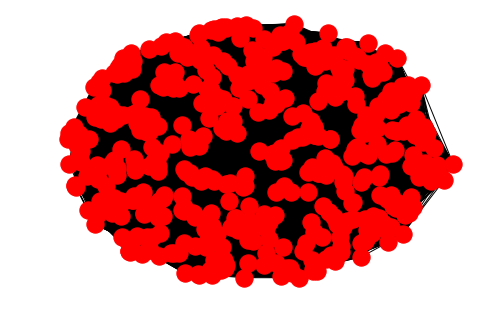

In [222]:
import networkx as nx
import numpy as np
import string
import matplotlib.pyplot as p

dt = [('len', float)]
A = diversity_matrix
A = A.view(dt)

G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),string.ascii_uppercase)))    

G = nx.Graph(G)

nx.draw(G)
p.show()


In [223]:
print(objRandom.estimators_[1].tree_.node_count)

41


In [224]:
# def get_distance(tree_One,tree_Two):
#     diff=0
#     dimension=len(tree_One)
# #     print(tree_One)
# #     print(tree_Two)
#     for inst in range(dimension):
#         if(tree_One[inst]==tree_Two[inst]):
#             diff=diff
#         else:
#             diff=diff+1  
            
#     diff=int(round(diff))        
#     return diff

In [298]:
from sklearn.manifold import TSNE
model =TSNE(n_components=2,metric="precomputed",random_state=0,perplexity=30,n_iter=250)
tsne_data=model.fit_transform(diversity_matrix)

# listPredict

Populating the interactive namespace from numpy and matplotlib
[[-0.14628348  2.89811063  0.        ]
 [-4.50572681  0.12549134  1.        ]
 [ 3.57523966  6.37275553  2.        ]
 ...
 [ 3.0686202   5.25170326  6.        ]
 [-4.04460478 -4.57289743  5.        ]
 [ 1.43481028  7.19450665  6.        ]]


C:\Users\Petrofac\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


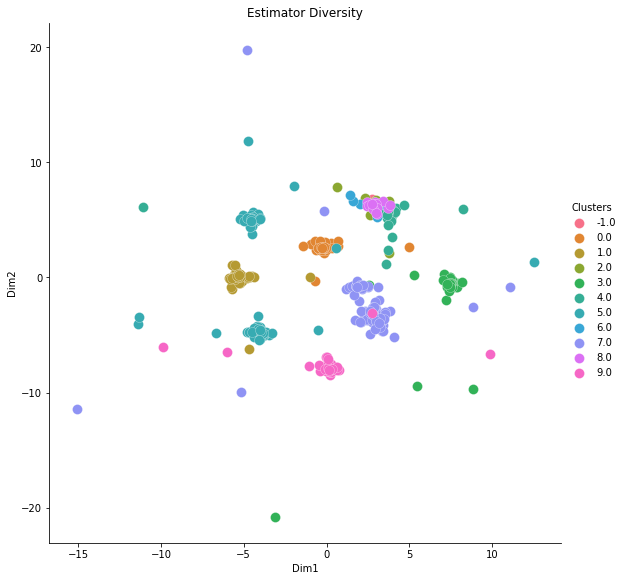

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
tsne_datastack=np.vstack((tsne_data.T,labels)).T
print(tsne_datastack)
tsne_df=pd.DataFrame(data=tsne_datastack,columns=("Dim1","Dim2","labels"))
sns.FacetGrid(tsne_df,hue="labels",size=8).map(plt.scatter,'Dim1','Dim2',alpha=1, 
      edgecolor='white', linewidth=0.25, s=100).add_legend(title="Clusters")
fig.subplots_adjust(top=0.8, wspace=0.3)
plt.title('Estimator Diversity')
plt.show()
# fig = figure(figsize=(10, 10))
# ax = axes()
# setp(ax, xticks=(), yticks=())
# subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
#                 wspace=0.0, hspace=0.0)
# scatter(tsne_data[:, 0], tsne_data[:, 1],
#         c=labels, marker="x")

Populating the interactive namespace from numpy and matplotlib


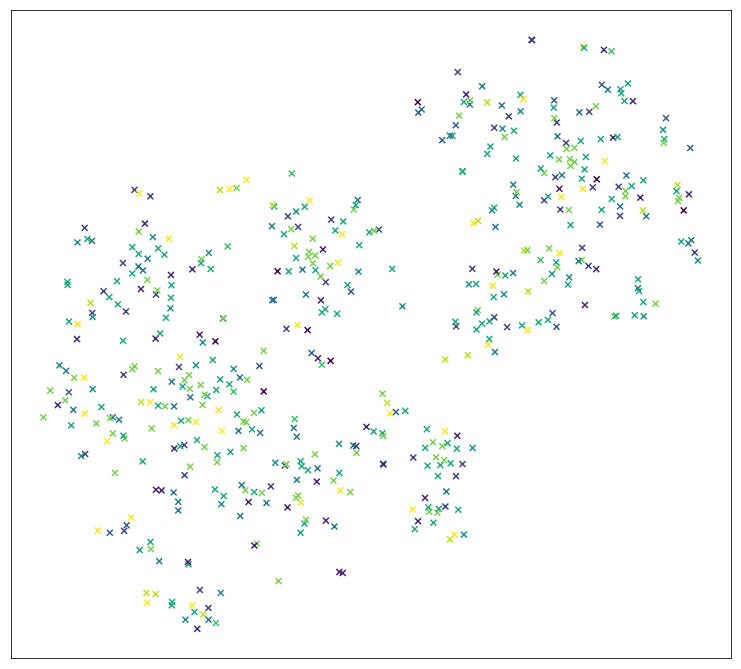

In [308]:
from sklearn.manifold import TSNE
model =TSNE(n_components=2,random_state=0,perplexity=10,n_iter=1000)
tsne_data=model.fit_transform(listPredict)

# listPredict
%pylab inline
fig = figure(figsize=(10, 10))
ax = axes()
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(tsne_data[:, 0], tsne_data[:, 1],
         c=labels,marker="x")